# Evaluation Project - 8: Flight Price Prediction

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### Size of training set: 10683 records

#### Size of test set: 2671 records

#### FEATURES:
- __Airline:__ The name of the airline.

- __Date_of_Journey:__ The date of the journey

- __Source:__ The source from which the service begins.

- __Destination:__ The destination where the service ends.

- __Route:__ The route taken by the flight to reach the destination.

- __Dep_Time:__ The time when the journey starts from the source.

- __Arrival_Time:__ Time of arrival at the destination.

- __Duration:__ Total duration of the flight.

- __Total_Stops:__ Total stops between the source and destination.

- __Additional_Info:__ Additional information about the flight


#### Target Column:
- __Price:__ The price of the ticket

 


- predict the price of the flight ticket. 

 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score,classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
flight_train=pd.read_excel("Data_Train.xlsx")

In [3]:
flight_test=pd.read_excel("Test_set.xlsx")

### Checking Top 5 rows Data

In [4]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EDA

## Checking Total Numbers of Rows and Column

In [6]:
flight_train.shape

(10683, 11)

In [7]:
flight_test.shape

(2671, 10)

## Checking All Column Names

In [8]:
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
flight_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

## Checking Data Type of All Data

In [10]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
flight_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

## Checking for Null Values

In [12]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### We can see there is Null Value present in column: 

    Route and Total_Stops

In [13]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

###### There is no null value present.

### Checking for Null Values through heatmap also

<AxesSubplot:>

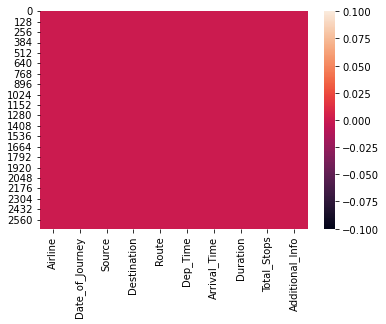

In [14]:
sns.heatmap(flight_test.isnull())

We can see here also that there is no Null Values present in our dataset.

<AxesSubplot:>

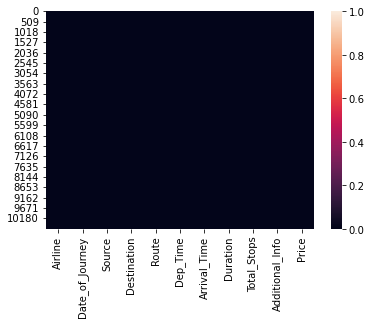

In [15]:
sns.heatmap(flight_train.isnull())

We can see here also that there is Null Value in our dataset.

## Information about Data (Memory Used and Data Types)

In [17]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [18]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Checking for ? values if present in our dataset or not

In [19]:
(flight_train==' ?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
(flight_train=='?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
(flight_train=='? ').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [22]:
(flight_test==' ?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [23]:
(flight_test=='?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [24]:
(flight_test=='? ').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

###### We can see there are no ? values present in our dataset

### Checking whether the dataset contains any space

In [25]:
flight_train[flight_train['Price'] == '']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


So we can see there are no spaces present in the dataset.

### Checking for blank value in our Target Column

In [26]:
flight_train[flight_train['Price'] == ''].index

Int64Index([], dtype='int64')

So, we can check there are no blank value present in our Target Column

### Checking values of Target Variable.

In [27]:
flight_train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

### Checking unique values present in the Target Variable.

In [28]:
flight_train['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [29]:
flight_train['Price'].nunique()

1870

### Checking unique elements of each columns

In [30]:
flight_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [31]:
flight_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

# Descriptive Statistics

In [32]:
# Description of flight_train Dataset : works only on continuous column 
flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- So, we can see that only one column is containing continuous data and rest 10 column contains categorical data.

### Checking Description through heatmap also.

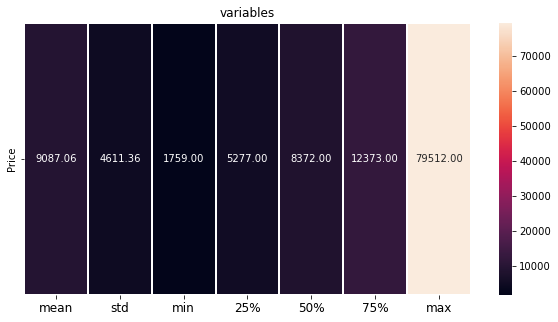

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(round(flight_train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:
- The summary of this dataset looks good as there are no negative/ invalid value present.
- We can see the counts of "Price" columns are 10683.000000 which means no null values are present.
- Total No of Rows: 10683 and Total No. of Columns: 11
- Only one column contains Continuous Data that is "Price".
- We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.

1. Price:
- Mean= 9087.064121,
- std= 4611.359167,
- Min= 1759.000000,
- Max= 79512.000000

#### In flight_test Dataset there are no continuous column so Statistics Description will not work on it.

## Data Cleaning and preprocessing of flight_train dataset

Since there are Null values in the dataset, so we need to treat them.

### Checking Duplicate Data in Dataset

In [34]:
flight_train[flight_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [35]:
#Droping Duplicate Values
flight_train.drop_duplicates(keep='first',inplace=True)

In [36]:
#checking again for duplicate values
flight_train[flight_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [38]:
# drop missing values rows
flight_train.dropna(inplace = True)

In [39]:
# checking again null values
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Date_of_Journey is an object data type, So, we need to convert this data type to a datetime data type for prediction.

In [40]:
flight_train['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [41]:
#converting datatype from object to datetime 
flight_train['Date_of_Journey']=pd.to_datetime(flight_train['Date_of_Journey'])

#### Extracting Month_of_Journey and Day_of_Journey from Date_of_Journey

In [42]:
#mapping Month values from 'Date_of_Journey' to 'Month_of_Journey' column in main dataframe
flight_train['Month_of_Journey']=flight_train['Date_of_Journey'].apply(lambda m:m.month)

In [43]:
#mapping Day values from 'Date_of_Journey' to 'Day_of_Journey' column in main dataframe
flight_train['Day_of_Journey']=flight_train['Date_of_Journey'].apply(lambda d:d.day)

#### Droping column "Date_of_Journey" after extracting Day and Month

In [44]:
flight_train.drop(columns=['Date_of_Journey'],inplace=True)

In [45]:
flight_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Extracting Dep_Hour and Dep_Minute from Dep_Time

In [46]:
# Extracting Hours
flight_train["Dep_Hour"] = pd.to_datetime(flight_train["Dep_Time"]).dt.hour

In [47]:
# Extracting Minutes
flight_train["Dep_Minute"] = pd.to_datetime(flight_train["Dep_Time"]).dt.minute

#### Droping Dep_Time after extraction

In [48]:
flight_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [49]:
flight_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Extracting Arrival_Hour and Arrival_Minute from Arrival_Time

In [50]:
# Extracting Hours
flight_train["Arrival_Hour"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.hour

In [51]:
# Extracting Minutes
flight_train["Arrival_Minute"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.minute

#### Droping Arrival_Time after extraction

In [52]:
flight_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [53]:
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Converting and  Extracting Duration column into list

In [54]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight_train["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]

Duration_Hours = []
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    
     # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset

flight_train["Duration_Hours"] = Duration_Hours
flight_train["Duration_Minutes"] = Duration_Minutes

#### Droping Duration column after extraction

In [55]:
flight_train.drop(["Duration"], axis = 1, inplace = True)

In [56]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [57]:
#Checking again Data Types
flight_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Month_of_Journey     int64
Day_of_Journey       int64
Dep_Hour             int64
Dep_Minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [58]:
#checking again all column names
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [59]:
#Checking again total Rows and Columns
flight_train.shape

(10462, 15)

## Data Cleaning and preprocessing of flight_test dataset

#### Date_of_Journey is an object data type, So, we need to convert this data type to a datetime data type for prediction.

In [60]:
flight_test['Date_of_Journey'].value_counts()

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
18/04/2019     12
1/03/2019      12
12/04/2019     11
Name: Date_of_Journey, dtype: int64

In [61]:
#converting datatype from object to datetime 
flight_test['Date_of_Journey']=pd.to_datetime(flight_test['Date_of_Journey'])

### Extracting Month_of_Journey and Day_of_Journey from Date_of_Journey

In [62]:
#mapping Month values from 'Date_of_Journey' to 'Month_of_Journey' column in main dataframe
flight_test['Month_of_Journey']=flight_test['Date_of_Journey'].apply(lambda m:m.month)

#mapping Day values from 'Date_of_Journey' to 'Day_of_Journey' column in main dataframe
flight_test['Day_of_Journey']=flight_test['Date_of_Journey'].apply(lambda d:d.day)

#### Droping column "Date_of_Journey" after extracting Day and Month

In [63]:
flight_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

### Extracting Dep_Hour and Dep_Minute from Dep_Time

In [64]:
# Extracting Hours
flight_test["Dep_Hour"] = pd.to_datetime(flight_test["Dep_Time"]).dt.hour

# Extracting Minutes
flight_test["Dep_Minute"] = pd.to_datetime(flight_test["Dep_Time"]).dt.minute

#### Droping Dep_Time after extraction

In [65]:
flight_test.drop(["Dep_Time"], axis = 1, inplace = True)

### Extracting Arrival_Hour and Arrival_Minute from Arrival_Time

In [66]:
# Extracting Hours
flight_test["Arrival_Hour"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.hour

# Extracting Minutes
flight_test["Arrival_Minute"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.minute

#### Droping Arrival_Time after extraction

In [67]:
flight_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [68]:
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


### Converting and Extracting Duration column into list

In [69]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight_test["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]

Duration_Hours = []
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    
     # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset

flight_test["Duration_Hours"] = Duration_Hours
flight_test["Duration_Minutes"] = Duration_Minutes

#### Droping Duration column after extraction

In [70]:
flight_test.drop(["Duration"], axis = 1, inplace = True)

In [71]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50


In [72]:
#Checking again Data Types
flight_test.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Month_of_Journey     int64
Day_of_Journey       int64
Dep_Hour             int64
Dep_Minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [73]:
#checking again all column names
flight_test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [74]:
#Checking again total Rows and Columns
flight_test.shape

(2671, 14)

# Data Visualization
## Univariate Analysis

### Using Countplot for categorical columns for flight_train Dataset

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

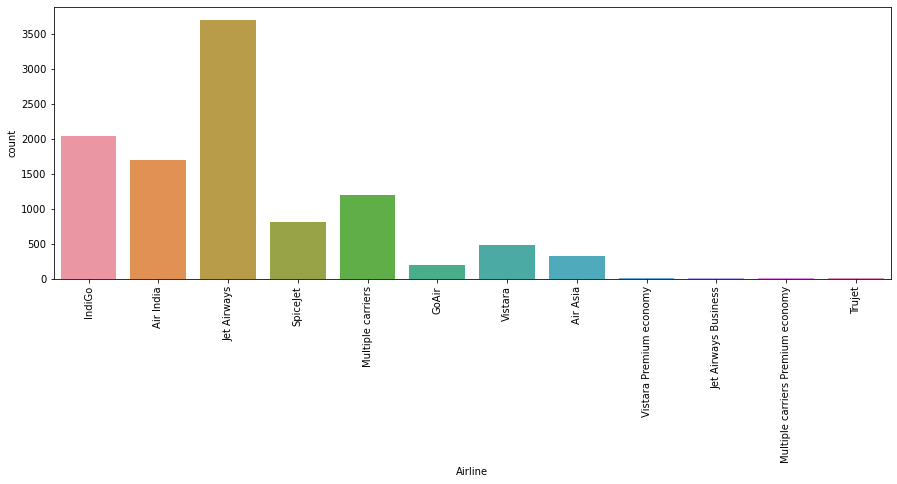

In [75]:
#Count Plot for "Airline" column
print(flight_train["Airline"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Airline",data=flight_train)
plt.xticks(rotation=90)

- Jet Airways have highest Airline (Total No= 3849)
- Trujet has least Airline (Total No= 1)

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

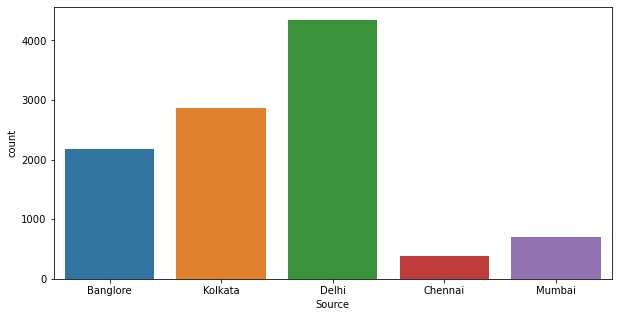

In [76]:
#Count Plot for "Source" column
print(flight_train["Source"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("Source",data=flight_train)

- Delhi is highest source station of Flights.
- Chennai is least source station of Flights.

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

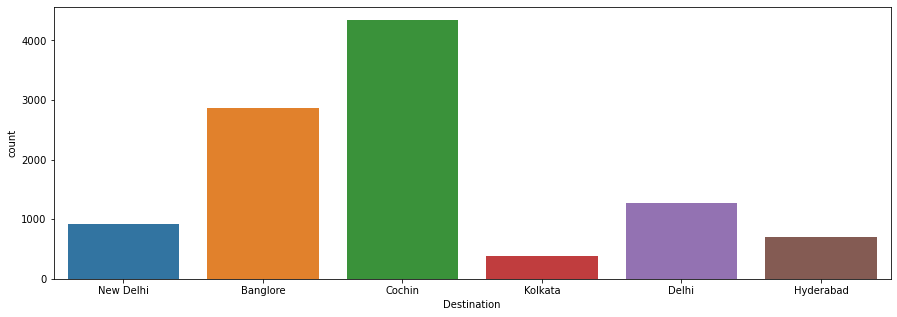

In [77]:
#Count Plot for "Destination" column
print(flight_train["Destination"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Destination",data=flight_train)

- Cochin is highest Destination station of Flights.
- Kolkata is least Destination station of Flights.

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Route'>

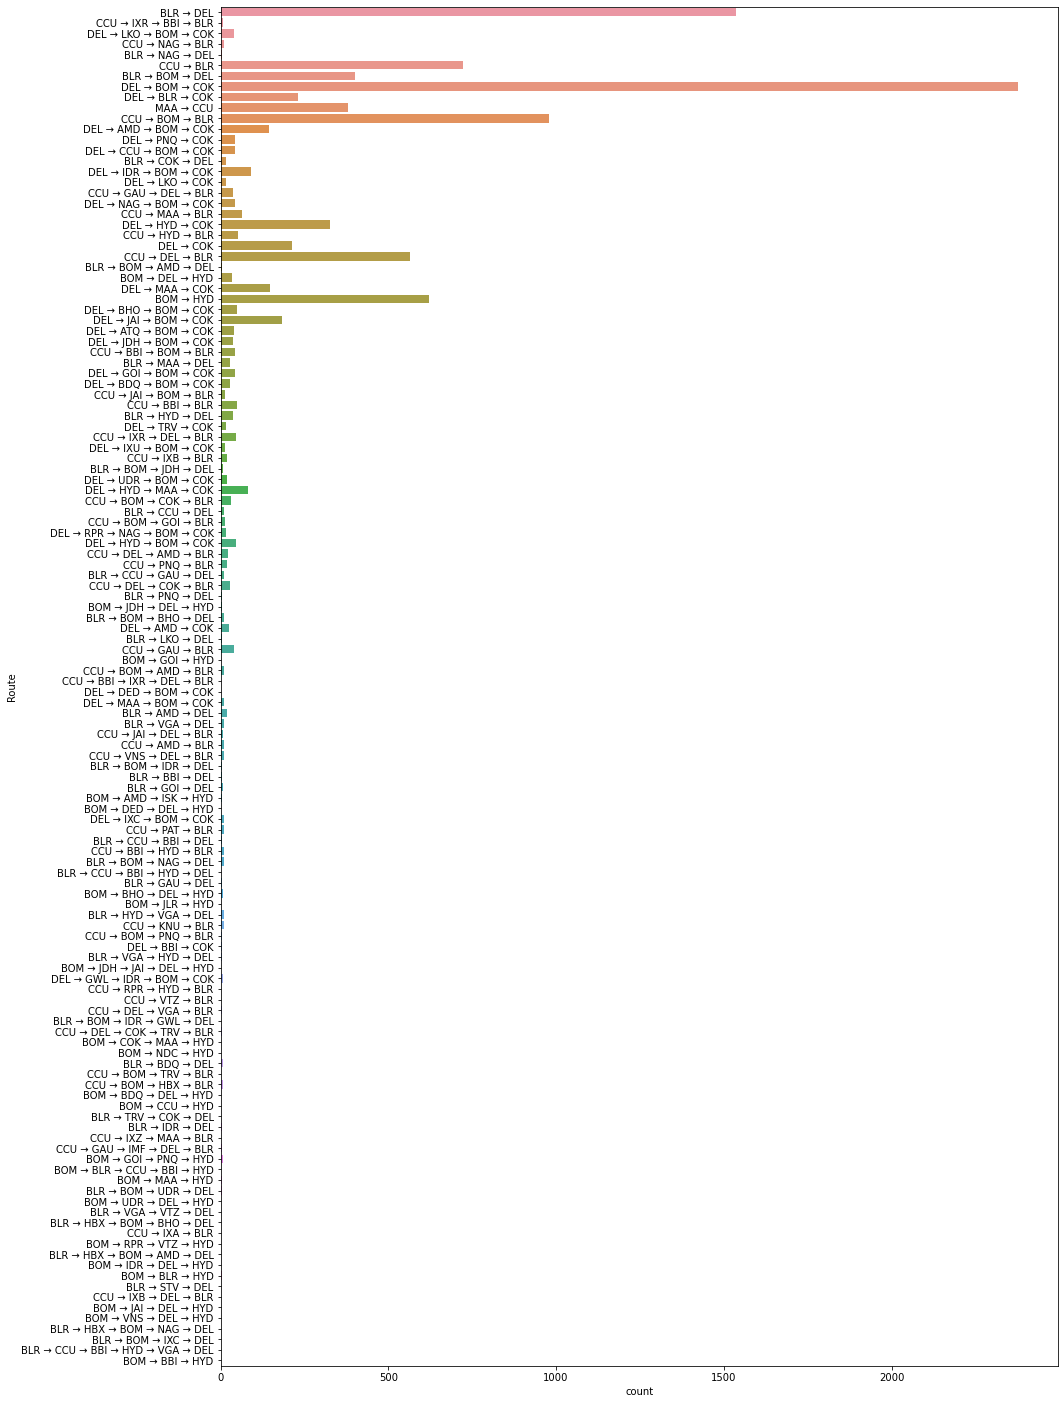

In [78]:
#Count Plot for "Route" column
print(flight_train["Route"].value_counts())
plt.figure(figsize=(15,25))
sns.countplot(y= "Route",data=flight_train)

- Route DEL → BOM → COK is the highest route taken by the flight to reach the destination from source and Second Highest route is BLR → DEL 

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

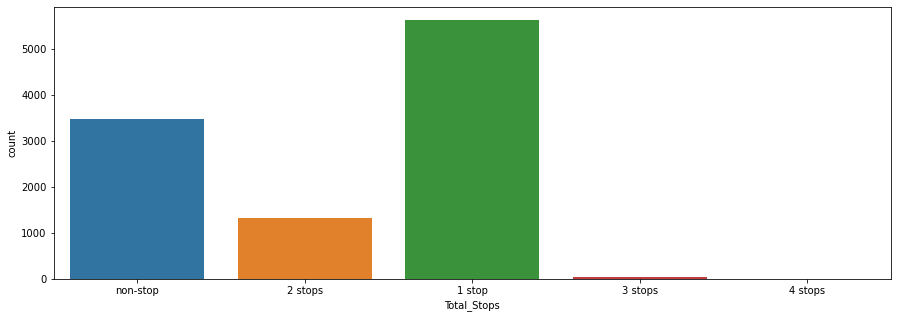

In [79]:
#Count Plot for "Total_Stops" column
print(flight_train["Total_Stops"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Total_Stops",data=flight_train)

1 stop is highest and 4 stops is least as flight stops

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

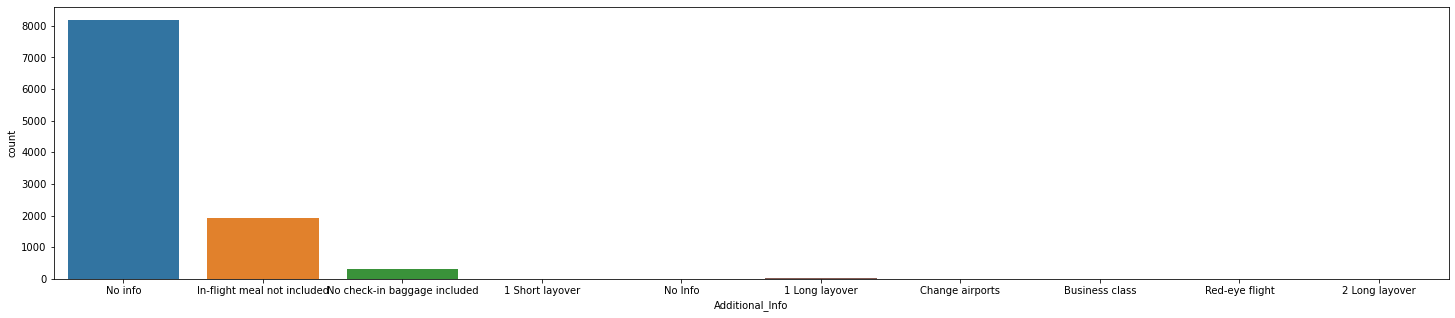

In [80]:
#Count Plot for "Additional_Info" column
print(flight_train["Additional_Info"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Additional_Info",data=flight_train)

- We can see in Dataset No info and No Info both are available which means same. So we will combine them.
- In Additional_Info, No Info is highest. So in most flights Additional_Info are not available but in some flights Additional_Info are available they are:
    - In-flight meal not included
    - No check-in baggage included
    - 1 Long layover
    - Change airports
    - Business class
    - 1 Short layover
    - Red-eye flight
    - 2 Long layover

### Using Countplot for categorical columns for flight_test Dataset

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

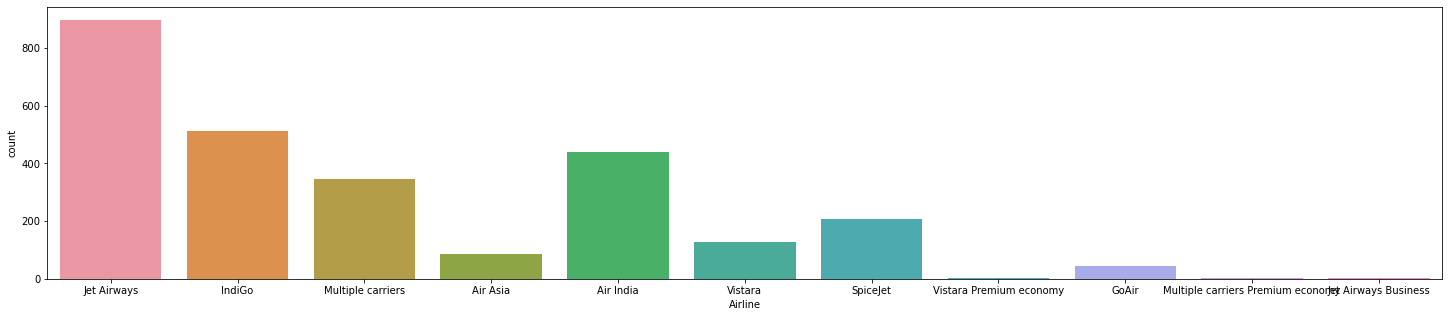

In [81]:
#Count Plot for "Airline" column
print(flight_test["Airline"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Airline",data=flight_test)

Jet Airways have highest Airline

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

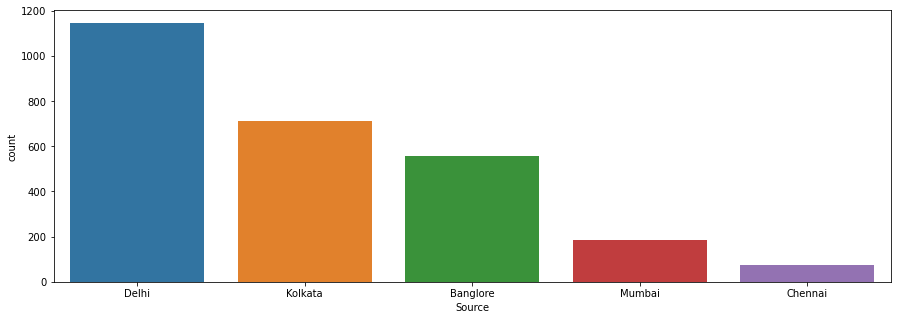

In [82]:
#Count Plot for "SourceSource" column
print(flight_test["Source"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Source",data=flight_test)

Delhi is used highest as source Station of Flights

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

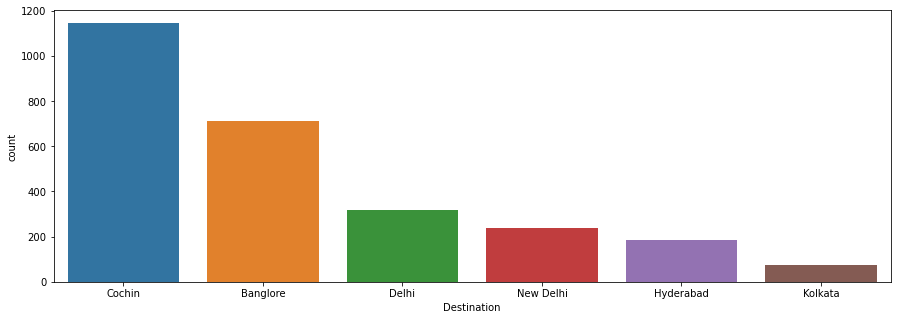

In [83]:
#Count Plot for "Destination" column
print(flight_test["Destination"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Destination",data=flight_test)

Cochin is Highest Destination Station of Flights

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Route'>

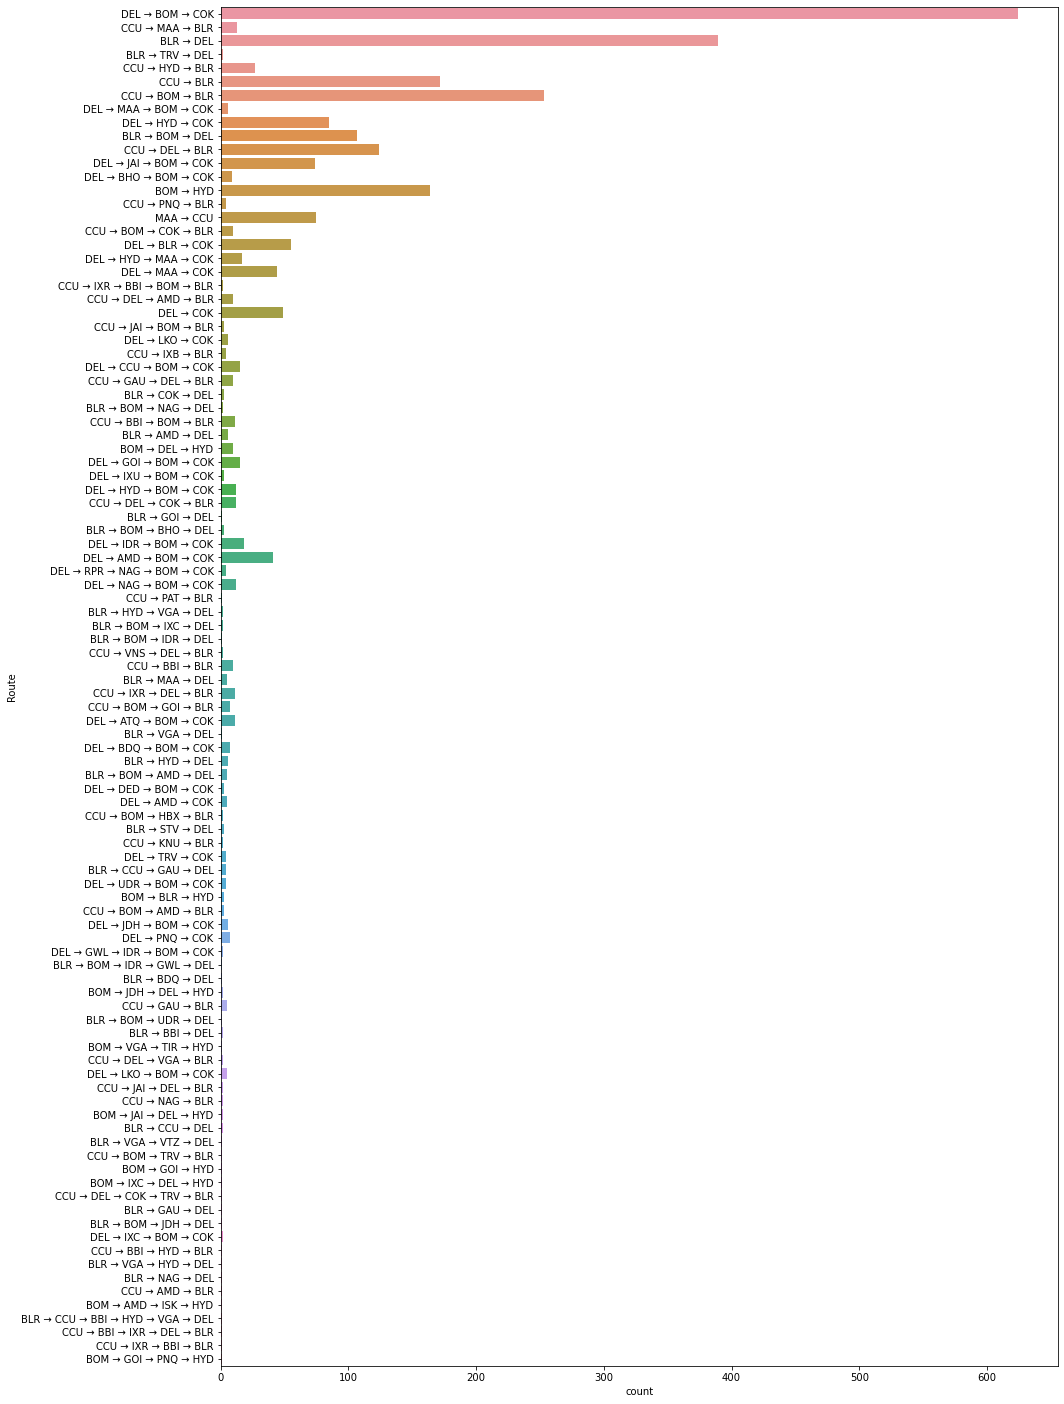

In [84]:
#Count Plot for "Route" column
print(flight_test["Route"].value_counts())
plt.figure(figsize=(15,25))
sns.countplot(y= "Route",data=flight_test)

Route DEL → BOM → COK is of most Flights

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

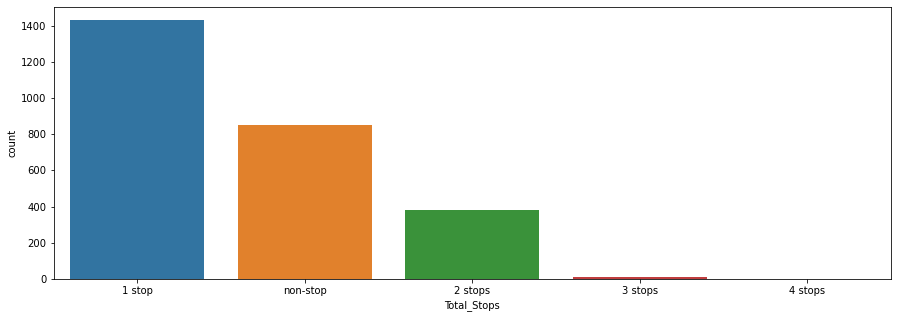

In [85]:
#Count Plot for "Total_Stops" column
print(flight_test["Total_Stops"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Total_Stops",data=flight_test)

1 stop of flights are most.

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

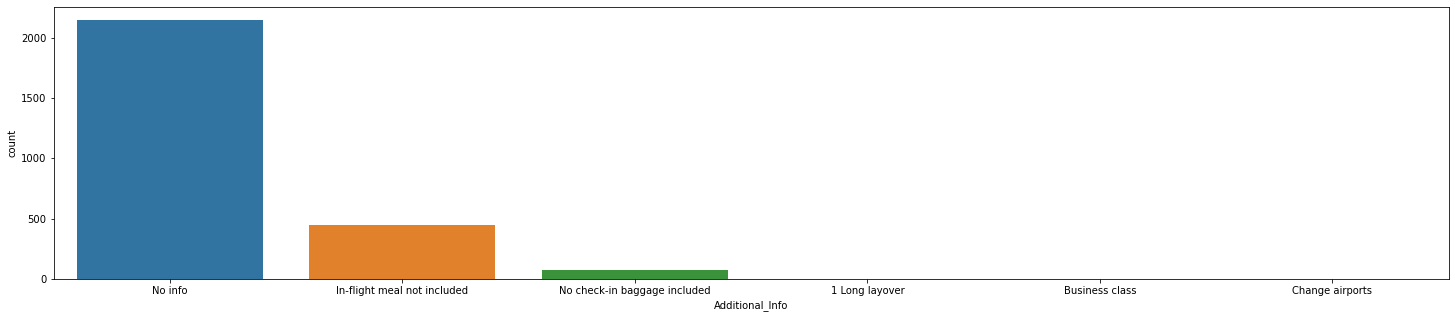

In [86]:
#Count Plot for "Additional_Info" column
print(flight_test["Additional_Info"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Additional_Info",data=flight_test)

Additional_Info having No info is most.

### Using Histplot for Continuous column for flight_train Dataset

10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
8925       1
11774      1
16497      1
8853       1
12648      1
Name: Price, Length: 1870, dtype: int64


<AxesSubplot:xlabel='Price', ylabel='Count'>

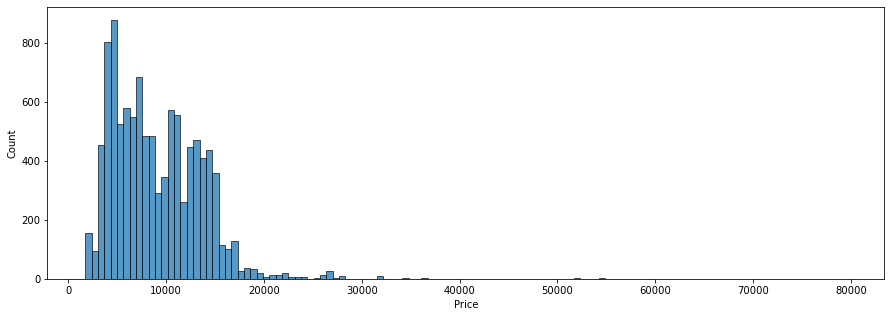

In [87]:
#HistPlot for "Price" column
print(flight_train["Price"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Price",data=flight_train)

Highest price of flight is 10262

6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Month_of_Journey, dtype: int64


<AxesSubplot:xlabel='Month_of_Journey', ylabel='Count'>

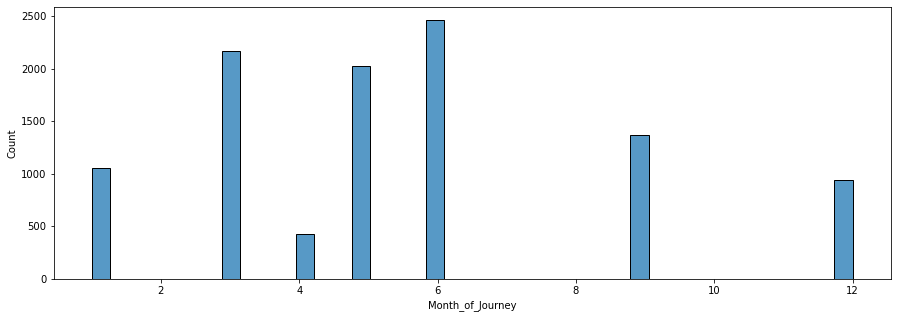

In [88]:
#HistPlot for "Month_of_Journey" column
print(flight_train["Month_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Month_of_Journey",data=flight_train)

In 6th Month that is June, maximum Journey (Total No= 2535) was done.

6     2114
5     1370
3     1344
27    1092
21    1085
24    1022
15     967
18     814
4      654
Name: Day_of_Journey, dtype: int64


<AxesSubplot:xlabel='Day_of_Journey', ylabel='Count'>

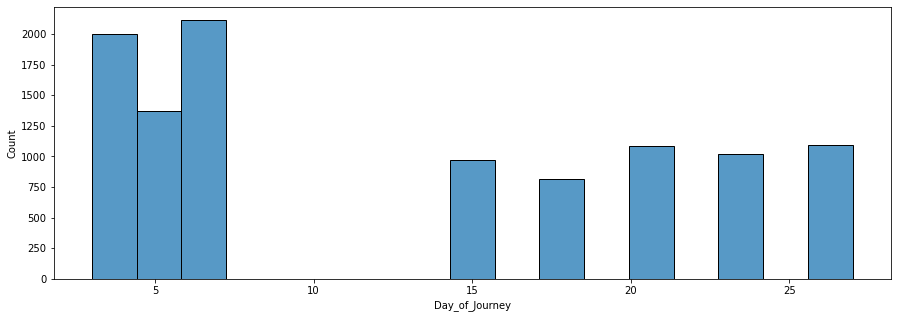

In [89]:
#HistPlot for "Day_of_Journey" column
print(flight_train["Day_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Day_of_Journey",data=flight_train)

On Date 6th, maximum Journey (Total No= 2166) was done.

9     886
7     863
8     694
17    689
6     675
20    649
5     582
11    579
19    544
10    527
14    505
21    489
16    461
18    441
13    411
22    373
15    319
2     194
12    178
4     169
23    133
0      40
1      37
3      24
Name: Dep_Hour, dtype: int64


<AxesSubplot:xlabel='Dep_Hour', ylabel='Count'>

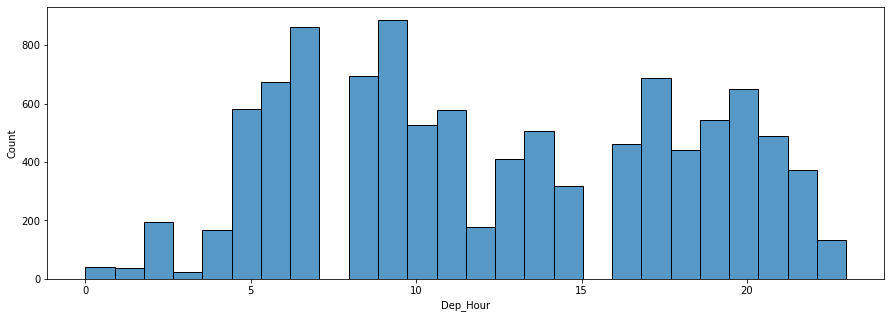

In [90]:
#Hist Plot for "Dep_Hour" column
print(flight_train["Dep_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Hour",data=flight_train)

9AM is maximum departure hour time of flight

0     2039
30    1173
55    1052
10     870
45     857
5      740
15     684
25     679
20     664
35     645
50     586
40     473
Name: Dep_Minute, dtype: int64


<AxesSubplot:xlabel='Dep_Minute', ylabel='Count'>

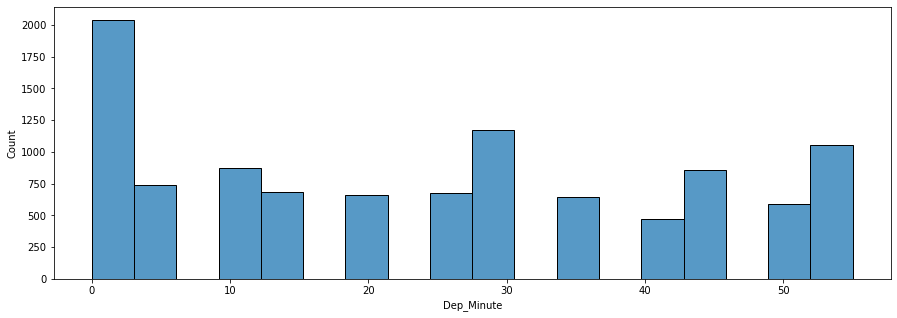

In [91]:
#Hist Plot for "Dep_Minute" column
print(flight_train["Dep_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Minute",data=flight_train)

0 min is maximum Departure minute of flight

19    1554
12     861
4      761
21     701
22     646
1      525
18     509
9      489
23     481
10     474
8      468
7      414
20     377
16     370
0      322
13     303
11     297
14     294
17     191
15     182
2       79
5       66
6       51
3       47
Name: Arrival_Hour, dtype: int64


<AxesSubplot:xlabel='Arrival_Hour', ylabel='Count'>

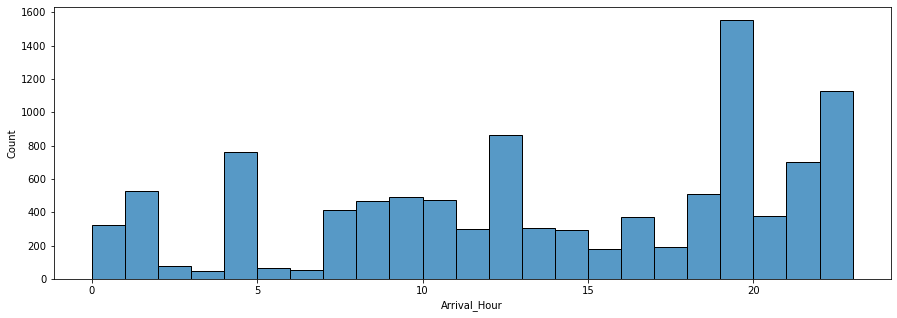

In [92]:
#Hist Plot for "Arrival_Hour" column
print(flight_train["Arrival_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Hour",data=flight_train)

7PM is the maximum time of arrival of Flight at Destination station

0     1417
15    1245
25    1224
35    1070
20     894
30     831
50     744
45     689
5      659
40     626
10     576
55     487
Name: Arrival_Minute, dtype: int64


<AxesSubplot:xlabel='Arrival_Minute', ylabel='Count'>

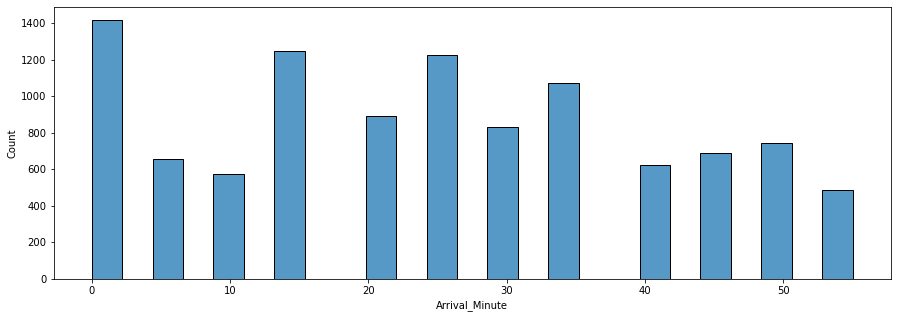

In [93]:
#HistPlot for "Arrival_Minute" column
print(flight_train["Arrival_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Minute",data=flight_train)

0 Minute is the maximum Minute of time of arrival of Flight at Destination station

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
34       7
35       7
31       6
36       5
47       2
42       2
39       1
0        1
41       1
40       1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='Count'>

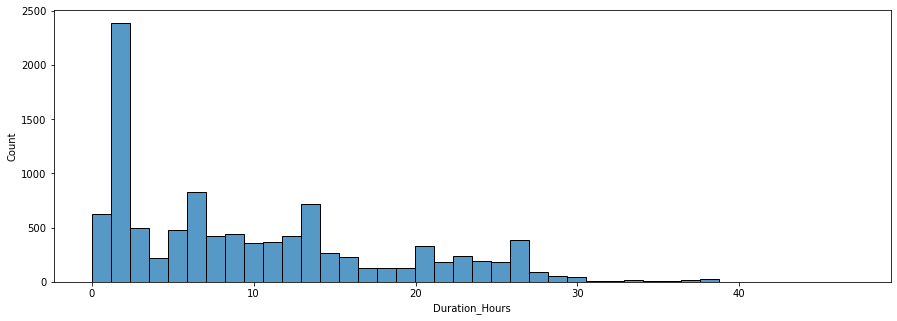

In [94]:
#HistPlot for "Duration_Hours" column
print(flight_train["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Hours",data=flight_train)

Maximum 2hour duration is taken by flight to reach at destination from source

30    1421
0     1005
20     979
50     950
35     930
15     884
45     874
55     856
25     801
40     622
5      620
10     520
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='Count'>

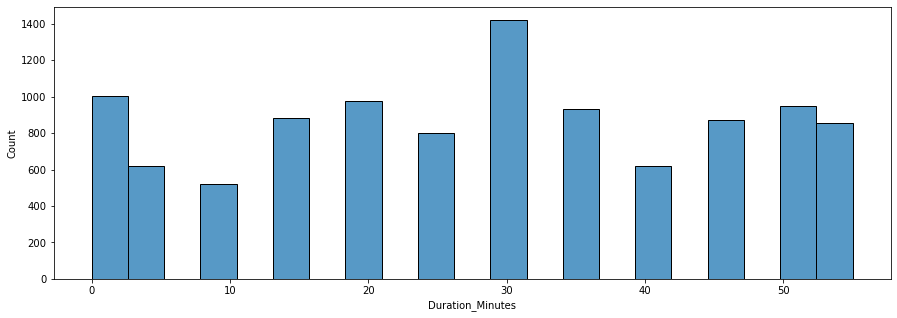

In [95]:
#HistPlot for "Duration_Minutes" column
print(flight_train["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Minutes",data=flight_train)

Maximum 30 Minute as Duration_Minutes is taken by flight to reach at destination from source

### Using Histplot for Continuous column of flight_test Dataset

6     650
3     545
5     489
9     363
1     274
12    257
4      93
Name: Month_of_Journey, dtype: int64


<AxesSubplot:xlabel='Month_of_Journey', ylabel='Count'>

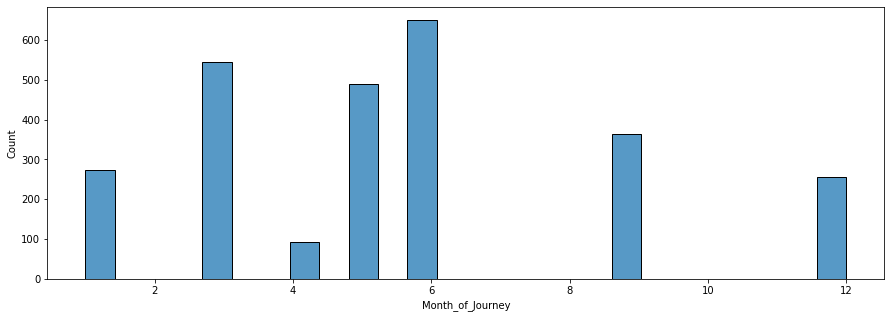

In [96]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Month_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Month_of_Journey",data=flight_test)

In 6th Month, maximum no of journey is done.

6     561
3     378
5     374
15    267
21    257
24    255
27    220
18    204
4     155
Name: Day_of_Journey, dtype: int64


<AxesSubplot:xlabel='Day_of_Journey', ylabel='Count'>

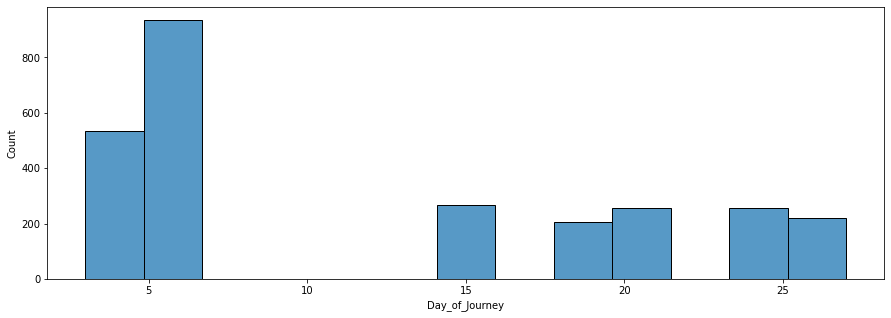

In [97]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Day_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Day_of_Journey",data=flight_test)

On date 6th maximum no of journey is done

9     236
7     200
6     176
20    175
8     175
17    152
5     147
19    143
10    141
11    134
21    133
16    132
14    124
15    112
18    109
22     99
13     94
12     54
4      49
2      34
23     28
0      11
1       7
3       6
Name: Dep_Hour, dtype: int64


<AxesSubplot:xlabel='Dep_Hour', ylabel='Count'>

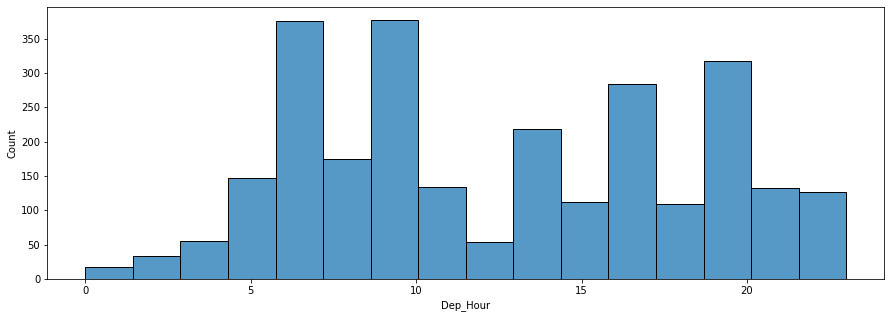

In [98]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Dep_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Hour",data=flight_test)

9AM is maximum departure Hour of Flights

0     528
30    276
55    274
45    230
10    209
15    184
5     178
50    176
25    173
20    153
35    148
40    142
Name: Dep_Minute, dtype: int64


<AxesSubplot:xlabel='Dep_Minute', ylabel='Count'>

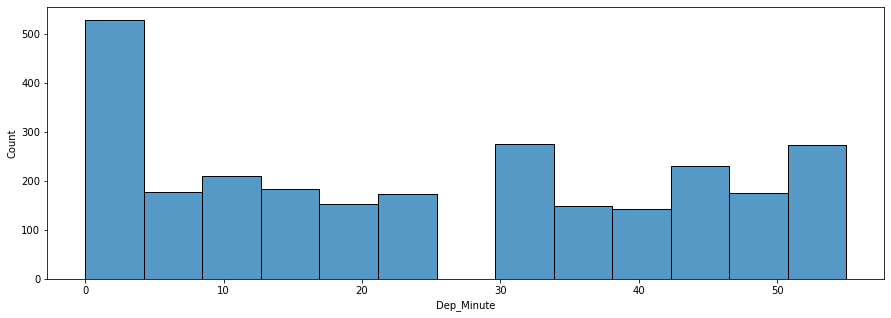

In [99]:
#Hist Plot for "Dep_Minutes" column
print(flight_test["Dep_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Minute",data=flight_test)

0 Minute is maximum departure Minute of Flights

19    431
12    198
21    195
22    190
4     175
1     159
18    126
23    123
8     123
10    117
20    112
7     101
9     101
0      89
16     79
11     67
14     65
13     64
17     51
15     40
5      26
3      14
2      13
6      12
Name: Arrival_Hour, dtype: int64


<AxesSubplot:xlabel='Arrival_Hour', ylabel='Count'>

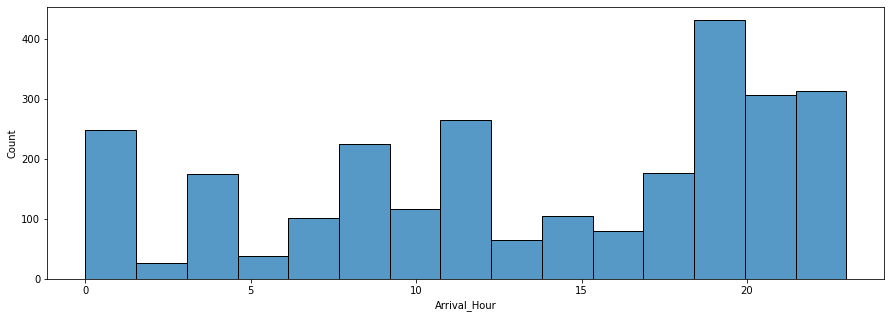

In [100]:
#Hist Plot for "Arrival_Hour" column
print(flight_test["Arrival_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Hour",data=flight_test)

7PM is maximum Arrival Hour of Flights at destination

0     381
15    326
25    297
35    254
30    230
20    204
45    192
50    185
5     179
40    156
10    140
55    127
Name: Arrival_Minute, dtype: int64


<AxesSubplot:xlabel='Arrival_Minute', ylabel='Count'>

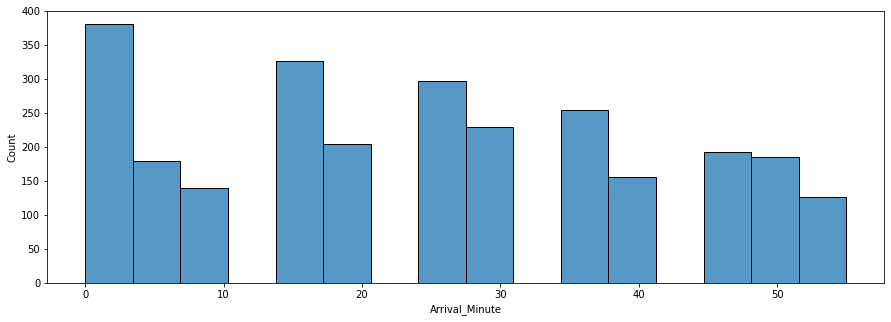

In [101]:
#Hist Plot for "Arrival_Minute" column
print(flight_test["Arrival_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Minute",data=flight_test)

0 Minute is maximum Arrival minutes of Flights at destination

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
20     41
21     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
39      1
34      1
40      1
0       1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='Count'>

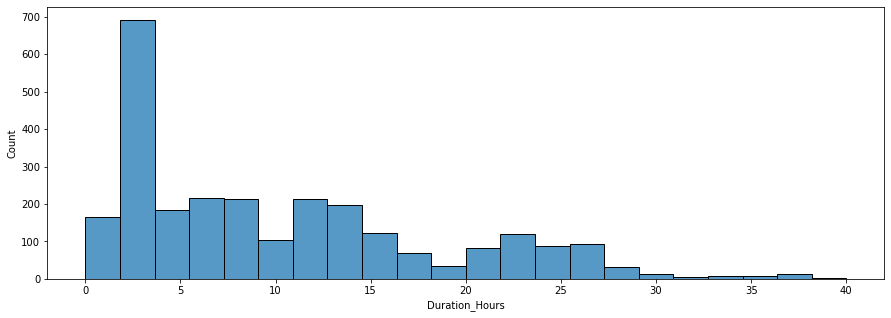

In [102]:
#Hist Plot for "Duration_Hours" column
print(flight_test["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Hours",data=flight_test)

2 Hour is maximum Duration hour of Flights to reach at destination from source

30    372
20    263
45    258
0     253
50    233
15    232
55    211
35    210
25    206
40    166
5     145
10    122
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='Count'>

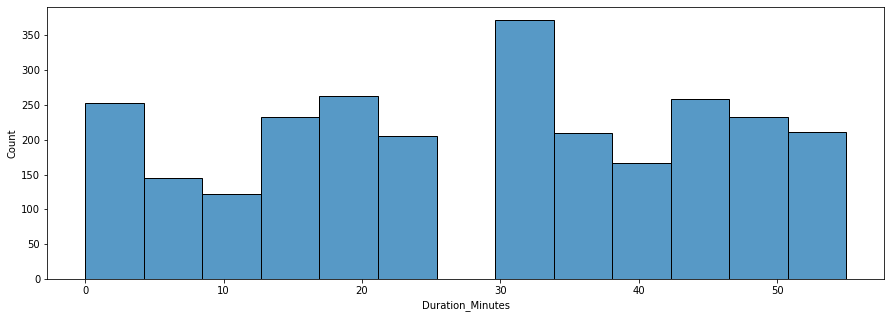

In [103]:
#Hist Plot for "Duration_Minutes" column
print(flight_test["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Minutes",data=flight_test)

30Minute is maximum Duration Minutes of Flights to reach at destination from source

## Bivariate Analysis
### Using Barplot 

<AxesSubplot:xlabel='Price', ylabel='Airline'>

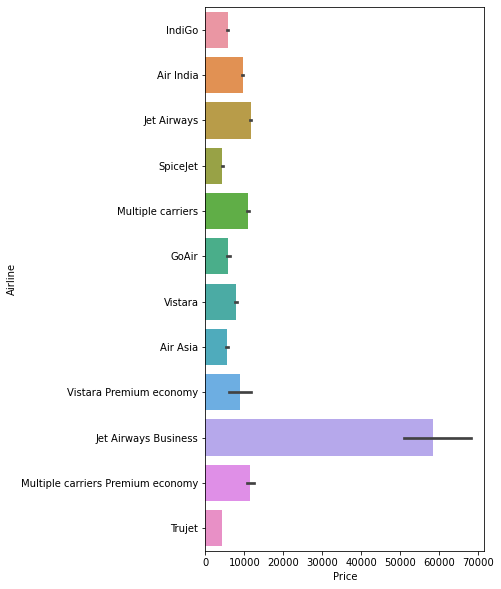

In [104]:
#CountPlot for comparision between "Airline" column and "Price" column
plt.figure(figsize=(5,10))
sns.barplot(y="Airline",data=flight_train, x='Price')

Jet Airways Business is having price of the ticket. It is approx 58000

<AxesSubplot:xlabel='Source', ylabel='Price'>

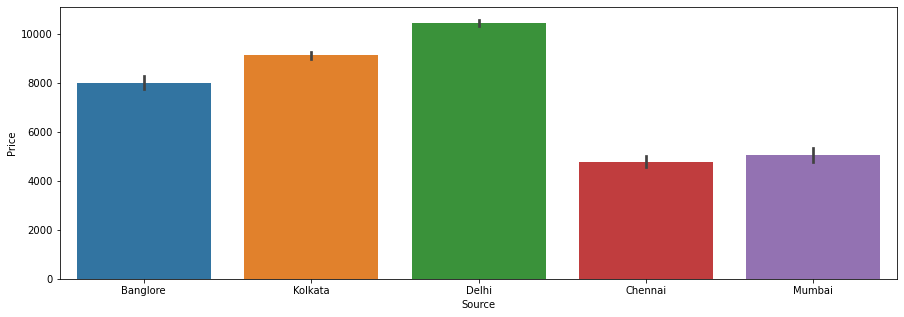

In [105]:
#CountPlot for comparision between "Source" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Source",data=flight_train, y='Price')

Source Station Delhi is having Highest price of the ticket and Least is of Chennai.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

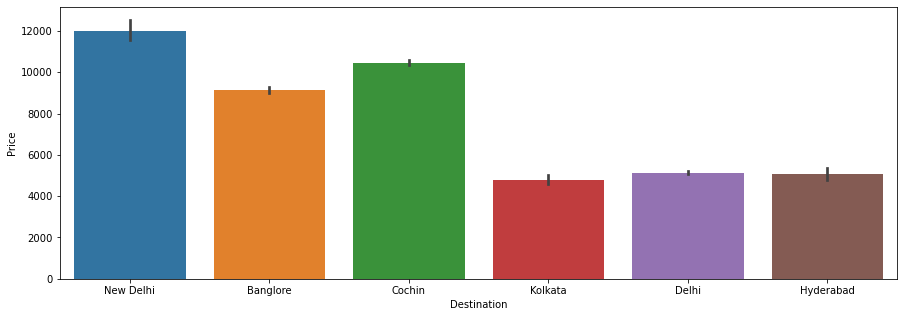

In [106]:
#BarPlot for comparision between "Destination" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Destination",data=flight_train, y='Price')

Destination Station New Delhi is having Highest price of the ticket and Least is of Kolkata.

<AxesSubplot:xlabel='Price', ylabel='Route'>

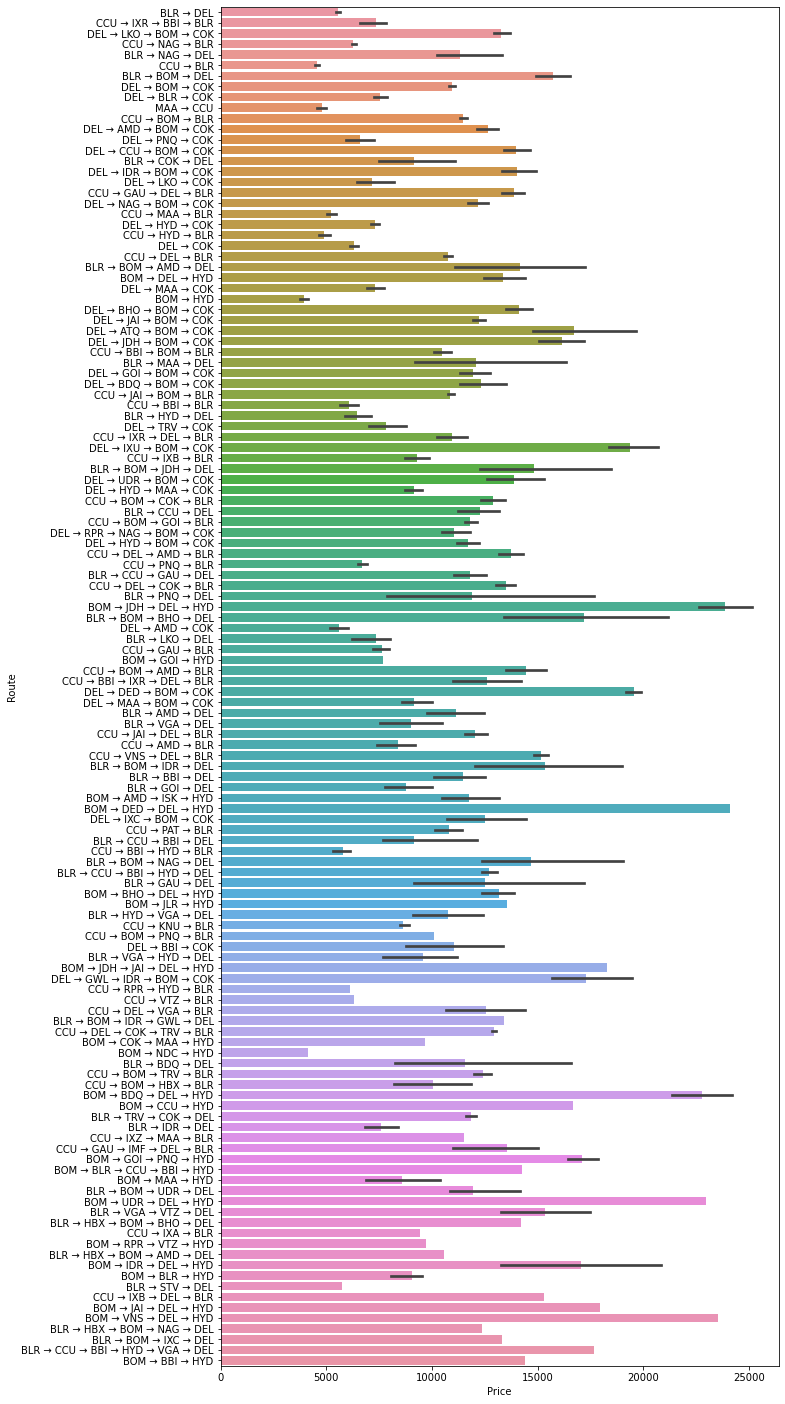

In [107]:
#BarPlot for comparision between "Route" column and "Price" column
plt.figure(figsize=(10,25))
sns.barplot(y="Route",data=flight_train, x='Price')

Route BOM->BDQ->DEL->HYD and BOM->JDH->DEL->HYD is having Highest price of the ticket.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

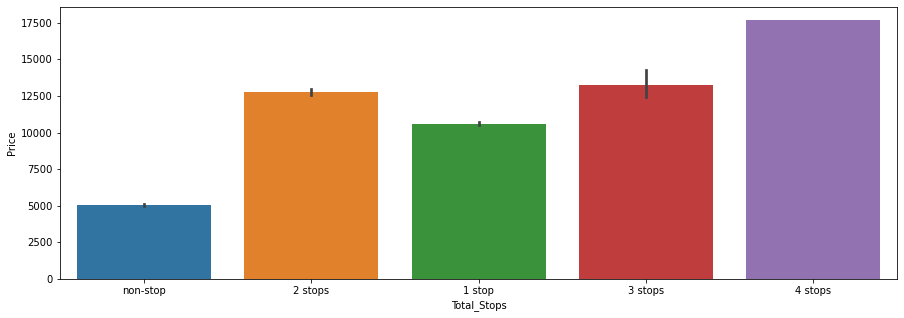

In [108]:
#BarPlot for comparision between "Total_Stops" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Total_Stops",data=flight_train, y='Price')

Total_Stops of 4 stops is having Highest price of the ticket and Least is of non-stop.

<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

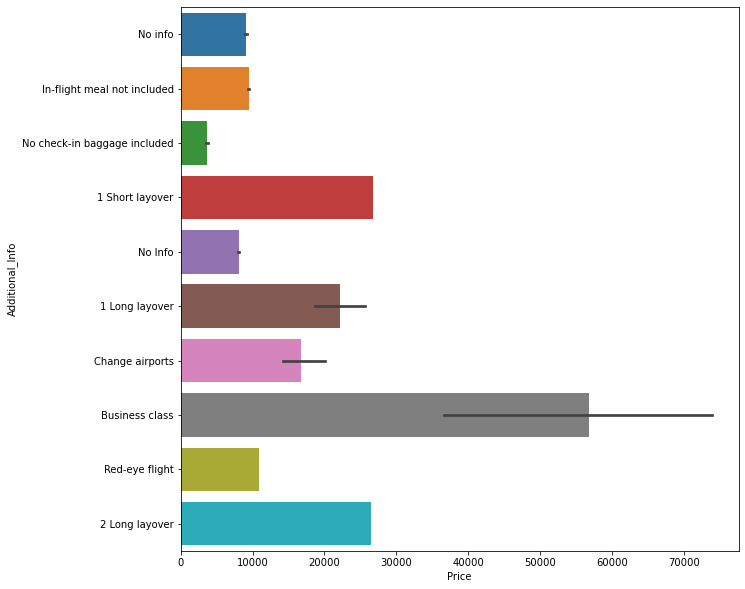

In [109]:
#BarPlot for comparision between "Additional_Info" column and "Price" column
plt.figure(figsize=(10,10))
sns.barplot(y="Additional_Info",data=flight_train, x='Price')

Business class as Additional_Info is having Highest price of the ticket and Least is of No check-in baggage included.

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

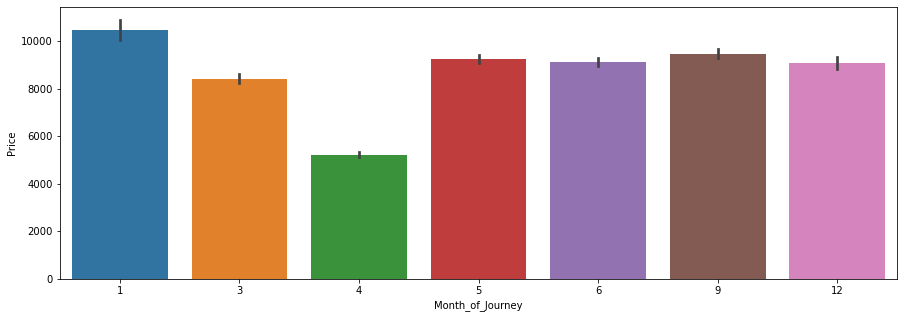

In [110]:
#BarPlot for comparision between "Month_of_Journey" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Month_of_Journey",data=flight_train, y='Price')

Journey done in 1st Month that is January is having Highest price of the ticket and Least is in 4th Mponth that is April.

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

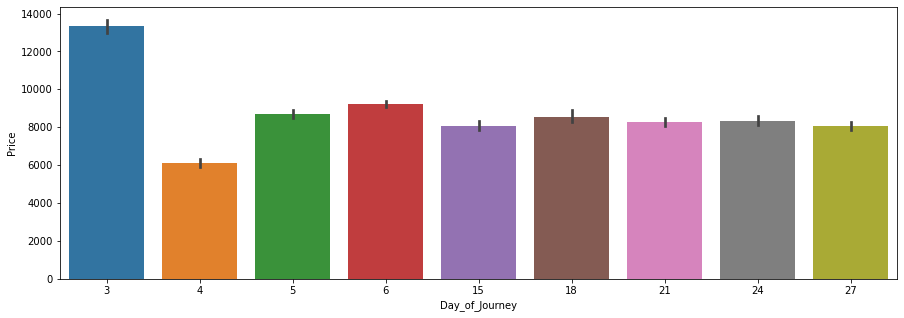

In [111]:
#BarPlot for comparision between "Day_of_Journey" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Day_of_Journey",data=flight_train, y='Price')

Journey done on date 3rd is having Highest price of the ticket and Least is of date 4th .

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

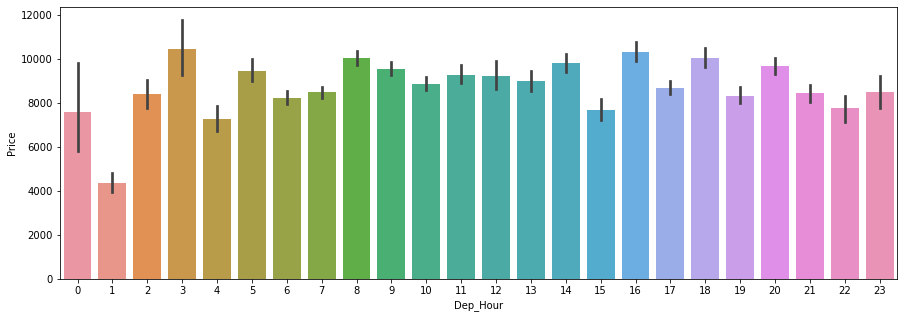

In [112]:
#BarPlot for comparision between "Dep_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Dep_Hour",data=flight_train, y='Price')

Departure Time 3AM is having Highest price of the ticket and Least is of 1AM.

<AxesSubplot:xlabel='Dep_Minute', ylabel='Price'>

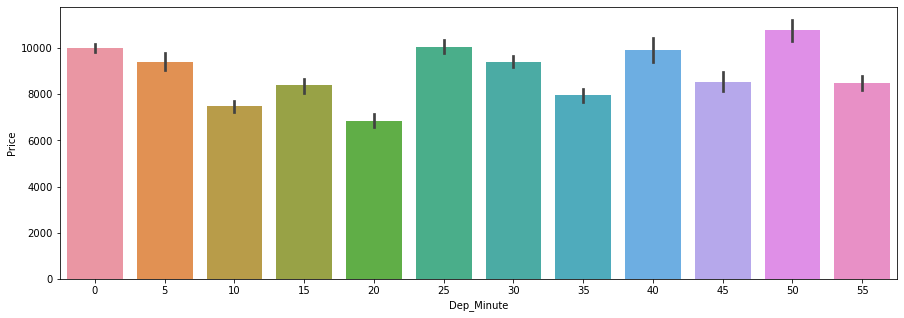

In [113]:
#BarPlot for comparision between "Dep_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Dep_Minute",data=flight_train, y='Price')

Departure Minute 50 is having Highest price of the ticket and Least is of 20minute.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

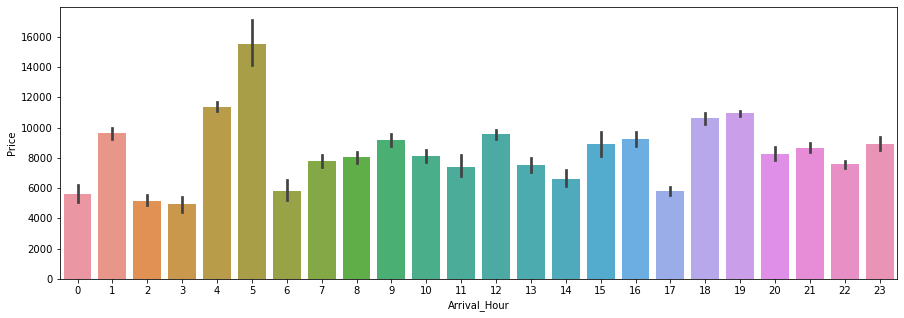

In [114]:
#BarPlot for comparision between "Arrival_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Hour",data=flight_train, y='Price')

Arrival_Hour 5 AM at Destination is having Highest price of the ticket and Least is of 3 AM.

<AxesSubplot:xlabel='Arrival_Minute', ylabel='Price'>

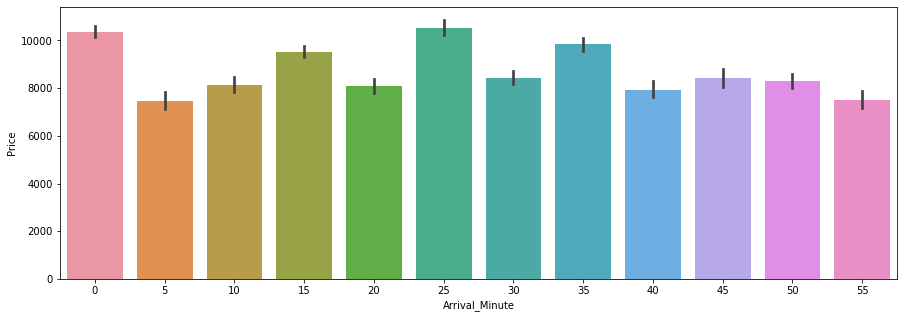

In [115]:
#BarPlot for comparision between "Arrival_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Minute",data=flight_train, y='Price')

Arrival_Minute 25 is having Highest price of the ticket and Least is of 5 Minute at Destination.

<AxesSubplot:xlabel='Duration_Hours', ylabel='Price'>

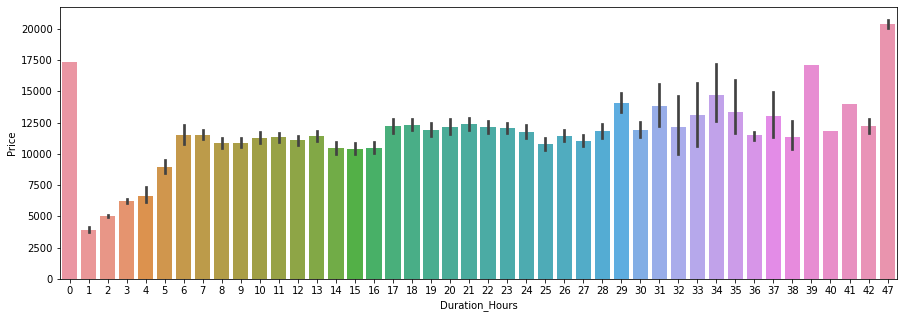

In [116]:
#BarPlot for comparision between "Duration_HoursDuration_Hours" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Hours",data=flight_train, y='Price')

Duration_Hour 47 is having Highest price of the ticket and Least is of 1 hour to reach from source to Destination.

<AxesSubplot:xlabel='Duration_Minutes', ylabel='Price'>

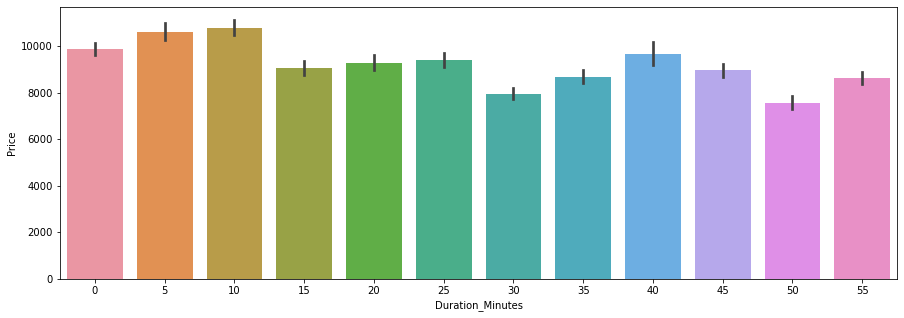

In [117]:
#BarPlot for comparision between "Duration_Minutes" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Minutes",data=flight_train, y='Price')

Duration_Minutes 10 is having Highest price of the ticket and Least is of 50 Minutes to reach from source to Destination.

## Multivariate Analysis
### Using Pairplot

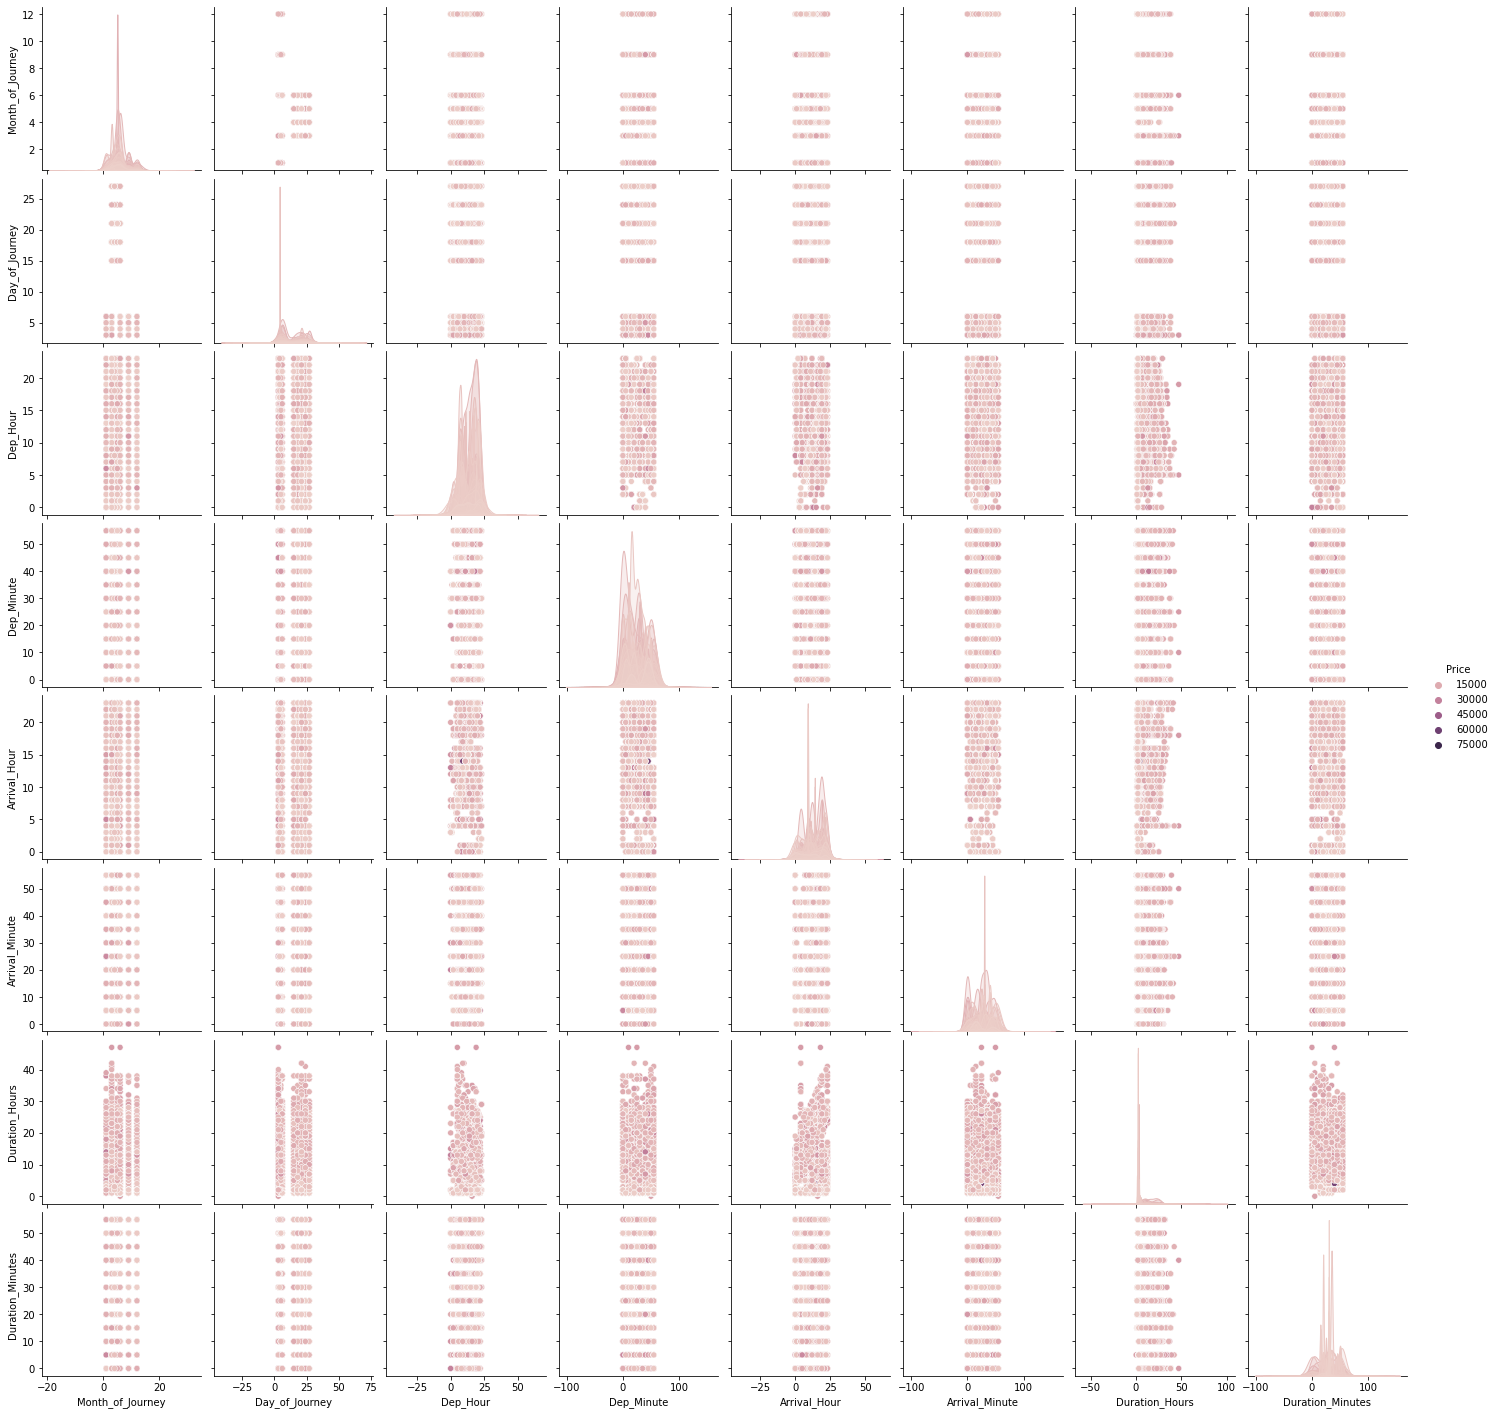

In [118]:
sns.pairplot(flight_train,hue="Price")

We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

#### In Additional_Info  column of flight_train Dataset 

In [119]:
#"No info" and "No Info" values are available which means same. So we will replace "No info" with "No Info"
flight_train["Additional_Info"].replace("No info","No Info",inplace=True)

In [120]:
flight_train.shape

(10462, 15)

# Label Encoding

In [121]:
#Encoding flight_train Dataset
enc = LabelEncoder()
for i in flight_train.columns:
    if flight_train[i].dtypes=="object":
        flight_train[i]=enc.fit_transform(flight_train[i].values.reshape(-1,1))

In [122]:
flight_train.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Price               int64
Month_of_Journey    int64
Day_of_Journey      int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hours      int64
Duration_Minutes    int64
dtype: object

In [123]:
#Encoding flight_test Dataset
enc = LabelEncoder()
for i in flight_test.columns:
    if flight_test[i].dtypes=="object":
        flight_test[i]=enc.fit_transform(flight_test[i].values.reshape(-1,1))

In [124]:
flight_test.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Month_of_Journey    int64
Day_of_Journey      int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hours      int64
Duration_Minutes    int64
dtype: object

### Checking dataset after transformation

In [125]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,3897,3,24,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,6,13302,1,3,16,50,21,35,4,45


In [126]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1,76,0,5,6,6,17,30,4,25,10,55
1,3,3,0,65,0,5,12,5,6,20,10,20,4,0
2,4,2,1,76,0,3,5,21,19,15,19,0,23,45
3,6,2,1,76,0,5,5,21,8,0,21,0,13,0
4,0,0,2,16,4,5,6,24,23,55,2,45,2,50


# Checking Correlation

In [127]:
#flight_train Dataset
flight_train.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.012172,0.015942,0.029636,0.034396,0.093385,-0.036491,-0.008680,0.031915,-0.032267,-0.062421,-0.005438,-0.073045,-0.151962,-0.031290
Source,-0.012172,1.000000,-0.589992,0.403884,-0.222859,0.009543,0.013796,0.062742,0.007833,0.060218,-0.056609,0.028257,0.021392,0.167051,-0.145475
Destination,0.015942,-0.589992,1.000000,-0.457559,0.334097,0.012898,-0.065875,-0.104578,-0.051797,-0.074056,0.128523,-0.044605,0.016351,-0.255273,0.060532
Route,0.029636,0.403884,-0.457559,1.000000,-0.436066,0.036994,0.154374,0.039996,0.094510,-0.075188,-0.070978,0.021612,-0.174172,0.280243,-0.241822
Total_Stops,0.034396,-0.222859,0.334097,-0.436066,1.000000,0.242290,-0.571991,-0.055529,0.045240,0.040310,0.049338,-0.099351,0.176743,-0.613582,0.184455
Additional_Info,0.093385,0.009543,0.012898,0.036994,0.242290,1.000000,-0.194898,0.001074,0.017940,-0.049426,0.004423,-0.024717,0.030685,-0.219854,0.058996
Price,-0.036491,0.013796,-0.065875,0.154374,-0.571991,-0.194898,1.000000,0.008662,-0.171142,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664
Month_of_Journey,-0.008680,0.062742,-0.104578,0.039996,-0.055529,0.001074,0.008662,1.000000,-0.265200,0.028462,0.001922,-0.003041,-0.023619,0.056828,-0.021506
Day_of_Journey,0.031915,0.007833,-0.051797,0.094510,0.045240,0.017940,-0.171142,-0.265200,1.000000,-0.007617,-0.013512,-0.001133,-0.019622,-0.046812,-0.007709
Dep_Hour,-0.032267,0.060218,-0.074056,-0.075188,0.040310,-0.049426,0.005155,0.028462,-0.007617,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843


This gives the correlation between the denpendent and independent variables.

In [128]:
flight_train.corr()["Price"].sort_values()

Total_Stops        -0.571991
Additional_Info    -0.194898
Day_of_Journey     -0.171142
Duration_Minutes   -0.131664
Arrival_Minute     -0.086163
Destination        -0.065875
Airline            -0.036491
Dep_Minute         -0.024155
Dep_Hour            0.005155
Month_of_Journey    0.008662
Source              0.013796
Arrival_Hour        0.031023
Route               0.154374
Duration_Hours      0.504200
Price               1.000000
Name: Price, dtype: float64

#### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 8 columns are negatively correlated and 6 columns are positively correlated.
- Column 'Duration_Hours' is highly positively correlated with Target column and Column 'Total_Stops' is highly negatively correlated with Target column

### Checking correlation with heatmap

<AxesSubplot:>

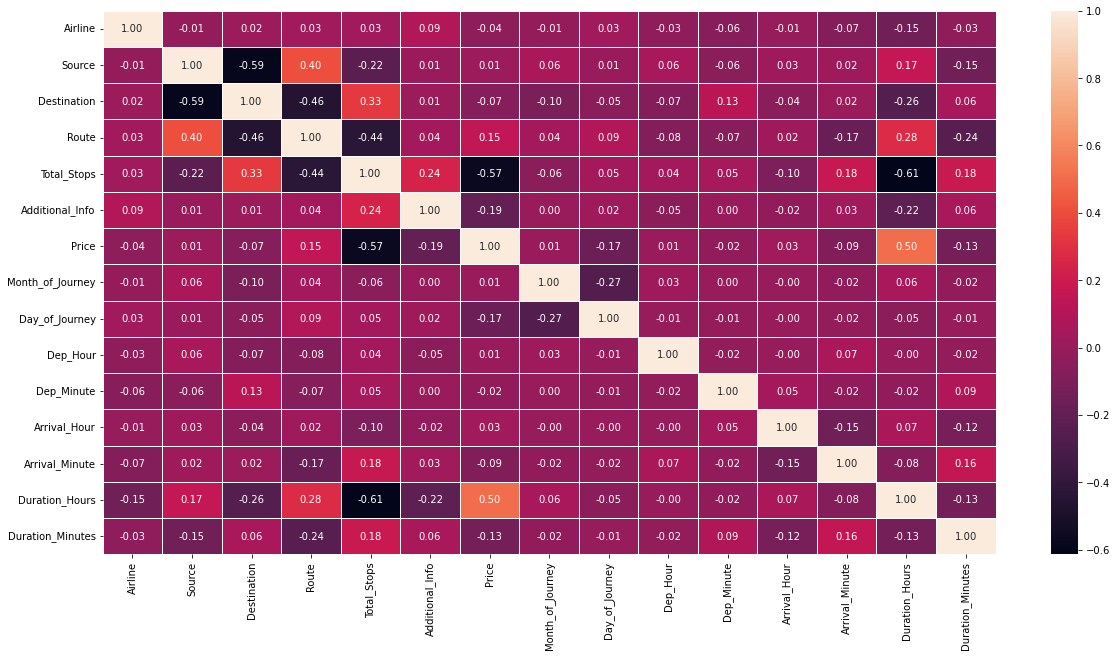

In [129]:
plt.figure(figsize=(20,10))
sns.heatmap(flight_train.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
- __Airline__ has __-4 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Source__ has __2 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Destination__ has __-7 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Route__ has __16 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Total_Stops__ has __-57 percent__ correlation with the target column which can be considered as weak correlation and negatively correlated. 
- __Additional_Info__ has __-19 percent__ correlation with the target column which can be considered as strong correlation and negatively correlated. 
- __Month_of_Journey__ has __1 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Day_of_Journey__ has __-17 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Dep_Hour__ has __1 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Dep_Minute__ has __-2 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Arrival_Hour__ has __2 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Arrival_Minute__ has __-9 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Duration_Hours__ has __51 percent__ correlation with the target column which can be considered as strong correlation and positively correlated. 
- __Duration_Minutes__ has __-12 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 


 - Max correlation is with __Duration_Hours__
 - Min correlation is with __Total_Stops__

### Checking correlation with barplot

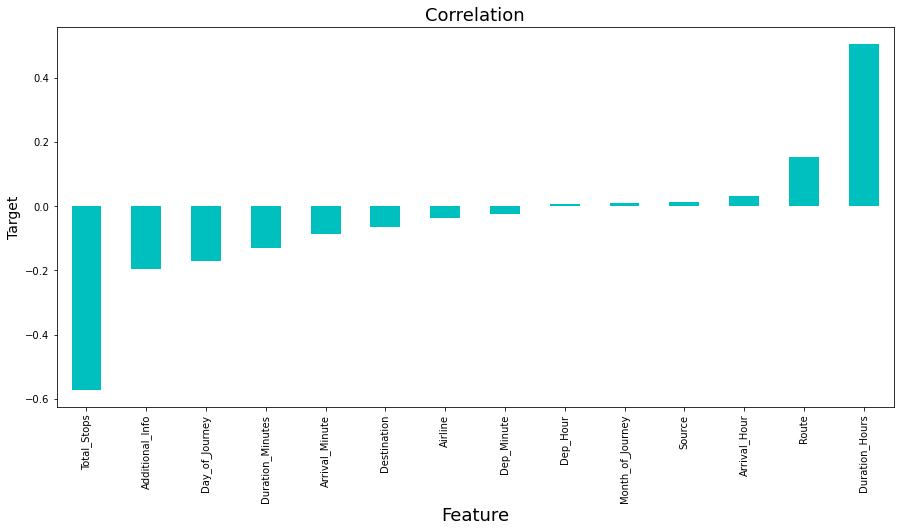

In [130]:
plt.figure(figsize=(15,7))
flight_train.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### Observation:
- Here we can see there is least correlation between Dep_Hour column and Target Column, Price. 
- Target column (Price) has Highest Positively Correlation is with Duration_Hours.
- Target column (Price) has Highest Negatively Correlation is with Total_Stops.

#### flight_test Dataset: We will not check correlation as Target Variable is not present in this Dataset

In [131]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

## Checking Outliers

### flight_train Dataset

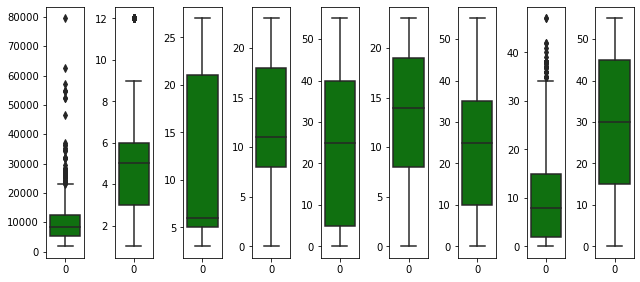

In [132]:
#checking outliers only for Continuous Column as we can not remove outliers of Categorical Column. So there is no need to check Outliers in Categorical Column.
collist=[ 'Price','Month_of_Journey', 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']
ncol=9
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__ "Price", "Month_of_Journey" and "Duration_Hours".

- But we will not remove Outliers from "Price" column as it is our Target column.

- __Outliers not present in columns:__ 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute' and 'Duration_Minutes'.

# Removing Outliers
## 1.1 Zscore method using Scipy

In [133]:
#  Outliers will be removed only from Continuous column i.e; "Month_of_Journey" and "Duration_Hours". 
# We will not remove outliers from Target column i.e; Price.

variable = flight_train[['Month_of_Journey', 'Duration_Hours']]

z=np.abs(zscore(variable))

# Creating new dataframe
flight_price = flight_train[(z<3).all(axis=1)]
flight_price.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,3897,3,24,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,6,13302,1,3,16,50,21,35,4,45


In [134]:
z.head()

,Month_of_Journey,Duration_Hours
0,0.846221,0.958051
1,1.513956,0.361223
2,1.156984,1.071164
3,2.158586,0.599954
4,1.513956,0.719320


In [135]:
print("Old DataFrame data in Rows and Column:",flight_train.shape)
print("New DataFrame data in Rows and Column:",flight_price.shape)
print("Total Dropped rows:",flight_train.shape[0]-flight_price.shape[0])

Old DataFrame data in Rows and Column: (10462, 15)
New DataFrame data in Rows and Column: (10402, 15)
Total Dropped rows: 60


### Percentage Data Loss using Zscore

In [136]:
loss_percent=(10682-10616)/10682*100
print(loss_percent,"%")

0.6178618236285339 %


## 2. IQR (Inter Quantile Range) method

In [137]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
flight_price_pred=flight_train[~((flight_train < (Q1 - 1.5 * IQR)) |(flight_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [138]:
print("Old DataFrame data in Rows and Column:",flight_train.shape)
print("\nNew DataFrame data in Rows and Column:",flight_price_pred.shape)
print("\nTotal Dropped rows:",flight_train.shape[0]-flight_price_pred.shape[0])

Old DataFrame data in Rows and Column: (10462, 15)

New DataFrame data in Rows and Column: (9453, 15)

Total Dropped rows: 1009


### Percentage Data Loss using IQR

In [139]:
loss_perc = (10682-9656)/10682*100
loss_perc

9.604942894589028

##### We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

### flight_test Dataset

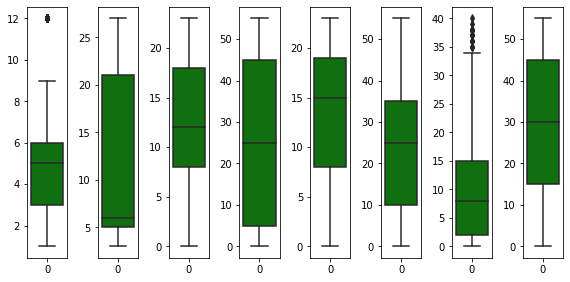

In [140]:
#checking outliers only for Continuous Column as we can not remove outliers of Categorical Column. So there is no need to check Outliers in Categorical Column.
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']
ncol=9
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight_test[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__  "Month_of_Journey" and "Duration_Hours".
- __Outliers not present in columns:__ 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute' and 'Duration_Minutes'.

# Removing Outliers
## 1. Zscore method using Scipy

In [141]:
#  Outliers will be removed only from Continuous column i.e; "Month_of_Journey" and "Duration_Hours". 
# We will not remove outliers from Target column i.e; Price.

variable = flight_train[['Month_of_Journey', 'Duration_Hours']]

z1=np.abs(zscore(variable))

# Creating new dataframe
flight_price1 = flight_test[(z1<3).all(axis=1)]
flight_price1.head()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
z1.head()

In [ ]:
print("Old DataFrame data in Rows and Column:",flight_test.shape)
print("New DataFrame data in Rows and Column:",flight_price1.shape)
print("Total Dropped rows:",flight_test.shape[0]-flight_price1.shape[0])

### Percentage Data Loss using Zscore

In [ ]:
loss_percent1=(2671-2654)/2671*100
print(loss_percent1,"%")

## 2.1 IQR (Inter Quantile Range) method

In [142]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
flight_price_pred1=flight_test[~((flight_test < (Q1 - 1.5 * IQR)) |(flight_test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [143]:
print("Old DataFrame data in Rows and Column:",flight_test.shape)
print("\nNew DataFrame data in Rows and Column:",flight_price_pred1.shape)
print("\nTotal Dropped rows:",flight_test.shape[0]-flight_price_pred1.shape[0])

Old DataFrame data in Rows and Column: (2671, 14)

New DataFrame data in Rows and Column: (2394, 14)

Total Dropped rows: 277


### Percentage Data Loss using IQR

In [144]:
loss_perc1 = (2671-2394)/2671*100
loss_perc1

10.370647697491577

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.
flight_test Dataset

# Checking Skewness

In [145]:
flight_price.skew()

Airline             0.721347
Source             -0.418789
Destination         1.220288
Route              -0.476762
Total_Stops         0.613096
Additional_Info    -3.293367
Price               1.868638
Month_of_Journey    0.629544
Day_of_Journey      0.375852
Dep_Hour            0.099781
Dep_Minute          0.169233
Arrival_Hour       -0.370963
Arrival_Minute      0.108047
Duration_Hours      0.802722
Duration_Minutes   -0.091619
dtype: float64

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.
- Columns which are having skewness: Airline,Source, Destination,Route, Total_Stops, Additional_Info, Price, Month_of_Journey, Day_of_Journey, Dep_Hour, Arrival_Hour, Duration_Hours. 
- The Additional_Info column data is negatively highly skewed and Price is positively highly skewed
- Since Airline,Source, Destination,Route, Total_Stops, Additional_Info are categorical column so we will not remove skewness and Price is Target Column so we will not remove skewness. 
- So we will remove skewness from Month_of_Journey, Day_of_Journey, Dep_Hour, Arrival_Hour, Duration_Hours as these column contains continuous data.

## Checking skweness through Data Visualization also

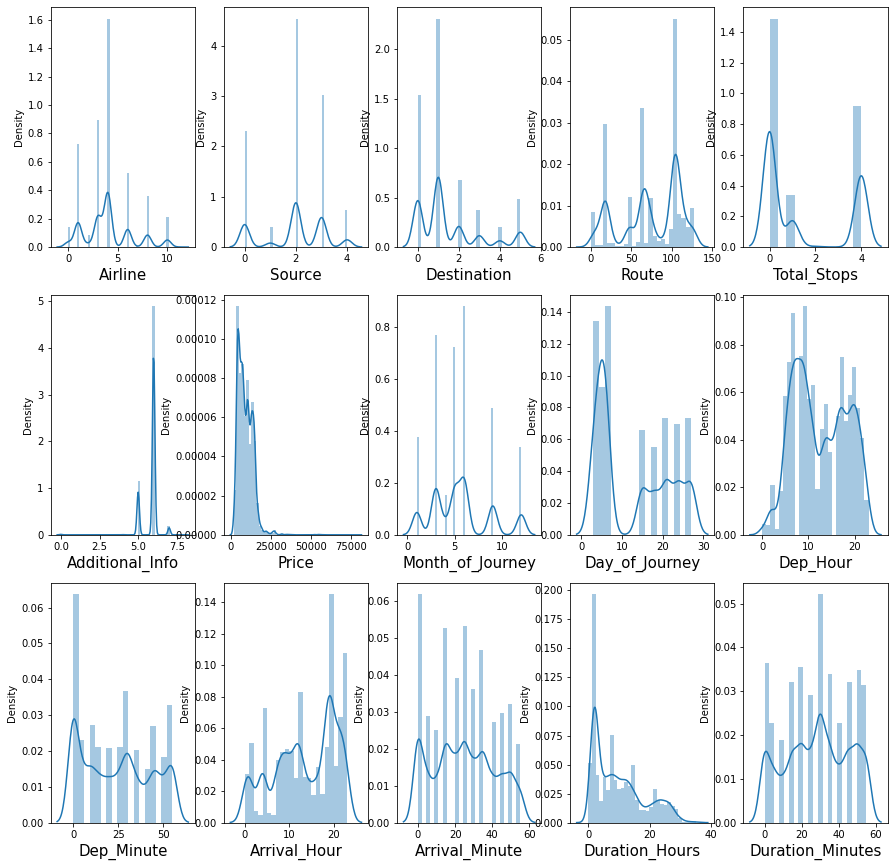

In [146]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in flight_price:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see all columns are highly skewed but we will remove skewness only from continuous columns

## Removing skewness using yeo-johnson method

In [147]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
flight_price[collist]=power_transform(flight_price[collist],method='yeo-johnson')
flight_price[collist]

,Month_of_Journey,Day_of_Journey,Dep_Hour,Arrival_Hour,Duration_Hours
0,-0.817764,1.184408,1.554692,-1.791619,-1.160777
1,-1.881459,-0.818987,-1.365193,-0.057611,-0.018012
2,1.135032,-0.595073,-0.559746,-1.363965,1.123883
3,1.841216,-0.818987,0.956272,1.413104,-0.361475
4,-1.881459,-1.416934,0.642827,1.117874,-0.575545
...,...,...,...,...,...
10678,1.135032,-1.086239,1.109202,1.265430,-1.160777
10679,-0.406713,1.336978,1.259822,1.413104,-1.160777
10680,-0.406713,1.336978,-0.750084,-0.349782,-0.833804
10681,-1.881459,-1.416934,-0.195536,0.088768,-1.160777


## checking skewness after removal

In [148]:
flight_price.skew()

Airline             0.721347
Source             -0.418789
Destination         1.220288
Route              -0.476762
Total_Stops         0.613096
Additional_Info    -3.293367
Price               1.868638
Month_of_Journey   -0.026846
Day_of_Journey      0.020936
Dep_Hour           -0.106460
Dep_Minute          0.169233
Arrival_Hour       -0.356694
Arrival_Minute      0.108047
Duration_Hours     -0.025907
Duration_Minutes   -0.091619
dtype: float64

Still we can see skewness is present but from earlier it is removed.

### checking skewness after removal through data visualization using distplot

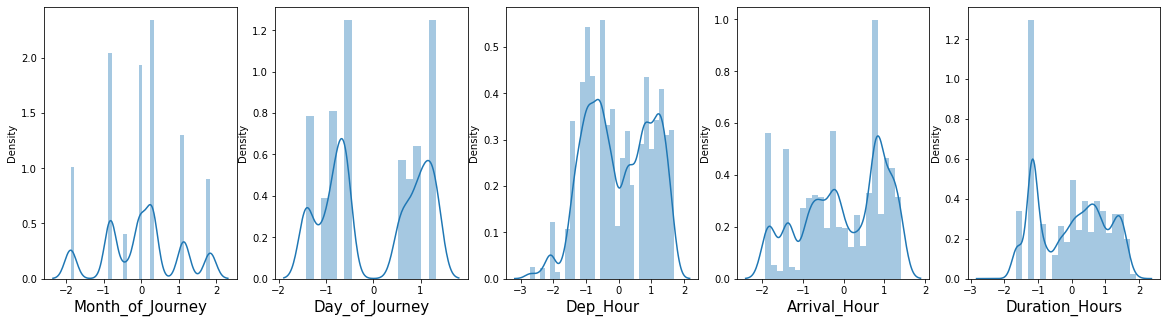

In [149]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
plt.figure(figsize=(20,5), facecolor='white')
plotnumber = 1

for column in flight_price[collist]:
    if plotnumber<=15:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data is not normal and the skewness is still present in some columns.

## 2.1 Checking skewness of flight_test Dataset

In [150]:
flight_price1.skew()

NameError: name 'flight_price1' is not defined

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.
- Columns which are having skewness: Airline, Source, Destination, Route, Total_Stops, Additional_Info, Month_of_Journey, Day_of_Journey, Arrival_Hour, Duration_Hours.
- The Additional_Info column data is negatively highly skewed and Destination is positively highly skewed
- Since Airline,Source, Destination,Route, Total_Stops, Additional_Info are categorical column so we will not remove skewness and Price is Target Column so we will not remove skewness.
- So we will remove skewness from Month_of_Journey, Day_of_Journey, Arrival_Hour, Duration_Hours as these column contains continuous data.

## 2.2 Checking skweness through Data Visualization also

In [ ]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in flight_price1:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight_price1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see all columns are highly skewed but we will remove skewness only from continuous columns

## 2.3 Removing skewness using yeo-johnson method

In [ ]:
collist1=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
flight_price1[collist1]=power_transform(flight_price1[collist1],method='yeo-johnson')
flight_price1[collist1]

## 2.4 checking skewness after removal

In [ ]:
flight_price1.skew()

## 2.5 checking skewness after removal through data visualization using distplot

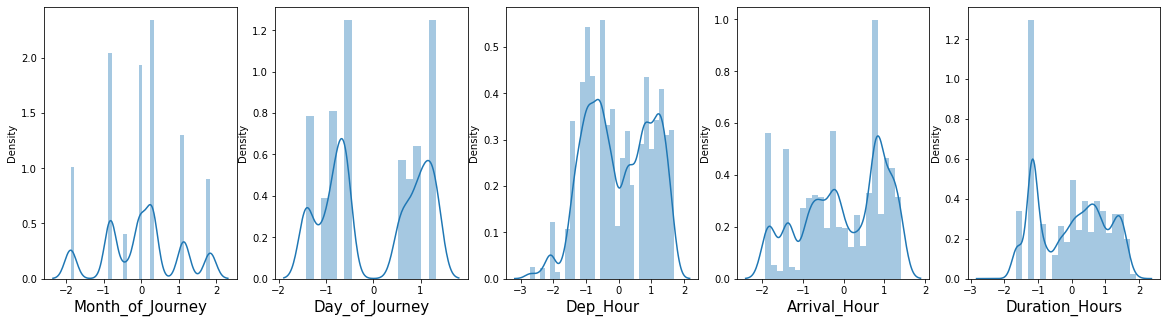

In [151]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
plt.figure(figsize=(20,5), facecolor='white')
plotnumber = 1

for column in flight_price[collist]:
    if plotnumber<=15:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data is not normal and the skewness is still present in some columns.

We can not process Data Preprocessing with flight_test Dataset as it is testing data. And it have no Target Variable. So we will only do Data preprocessing on flight_train Dataset as it is training dataset.  We have also not combined train and test data because of data leakage due to which our test data will know some of the results which is not good for the project.

# Data preprocessing
## Spliting data into Target and Features:

In [155]:
x=flight_price.drop("Price",axis=1)
y=flight_price["Price"]

In [156]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [157]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,-0.817764,1.184408,1.554692,20,-1.791619,10,-1.160777,50
1,1,3,0,84,1,6,-1.881459,-0.818987,-1.365193,50,-0.057611,15,-0.018012,25
2,4,2,1,118,1,6,1.135032,-0.595073,-0.559746,25,-1.363965,25,1.123883,0
3,3,3,0,91,0,6,1.841216,-0.818987,0.956272,5,1.413104,30,-0.361475,25
4,3,0,5,29,0,6,-1.881459,-1.416934,0.642827,50,1.117874,35,-0.575545,45


In [158]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [159]:
x.shape, y.shape

((10402, 14), (10402,))

# Scaling data using Standard Scaler

In [160]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [161]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-0.419980,-1.643534,2.400420,-1.530242,1.388306,0.327646,-0.817764,1.184408,1.554692,-0.234833,-1.791619,-0.887554,-1.160777,1.286652
1,-1.266041,0.880363,-0.971240,0.269057,-0.254477,0.327646,-1.881459,-0.818987,-1.365193,1.359813,-0.057611,-0.586002,-0.018012,-0.194278
2,0.003050,0.039064,-0.296908,1.195968,-0.254477,0.327646,1.135032,-0.595073,-0.559746,0.030941,-1.363965,0.017104,1.123883,-1.675207
3,-0.419980,0.880363,-0.971240,0.459891,-0.802072,0.327646,1.841216,-0.818987,0.956272,-1.032156,1.413104,0.318657,-0.361475,-0.194278
4,-0.419980,-1.643534,2.400420,-1.230359,-0.802072,0.327646,-1.881459,-1.416934,0.642827,1.359813,1.117874,0.620210,-0.575545,0.990466


## Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [162]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [163]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [164]:
x.columns[var_threshold.get_support()]

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [165]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [166]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(flight_test)

VarianceThreshold(threshold=0)

So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will check through SelectKBest method.

## Principle Component Analysis

In [167]:
from sklearn.decomposition import PCA

variance :0.9999999999999997


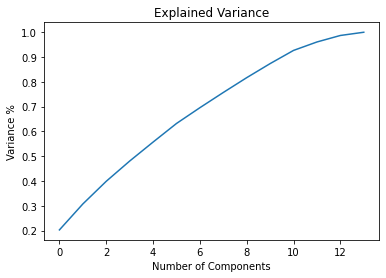

In [168]:
pca = PCA()
principleComponents = pca.fit_transform(x)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

13 components explain around 99% variance in Data

## SelectKBest method

In [169]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [170]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(14,'Score'))

             Feature       Score
4        Total_Stops  357.191137
3              Route  256.529578
1             Source  184.732956
2        Destination  112.792826
0            Airline   77.260126
12    Duration_Hours   37.357918
5    Additional_Info   24.685570
10      Arrival_Hour    4.707427
7     Day_of_Journey    4.048996
9         Dep_Minute    3.637471
11    Arrival_Minute    3.456533
13  Duration_Minutes    3.206888
8           Dep_Hour    2.925343
6   Month_of_Journey    2.893778


##### Selecting the best features based on above scores, we can see that the column "Month_of_Journey" has most lowest features for the prediction, so we will drop this column.

In [171]:
x = x.drop([ "Month_of_Journey"],axis=1)

In [172]:
x.shape

(10402, 13)

In [173]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-0.419980,-1.643534,2.400420,-1.530242,1.388306,0.327646,1.184408,1.554692,-0.234833,-1.791619,-0.887554,-1.160777,1.286652
1,-1.266041,0.880363,-0.971240,0.269057,-0.254477,0.327646,-0.818987,-1.365193,1.359813,-0.057611,-0.586002,-0.018012,-0.194278
2,0.003050,0.039064,-0.296908,1.195968,-0.254477,0.327646,-0.595073,-0.559746,0.030941,-1.363965,0.017104,1.123883,-1.675207
3,-0.419980,0.880363,-0.971240,0.459891,-0.802072,0.327646,-0.818987,0.956272,-1.032156,1.413104,0.318657,-0.361475,-0.194278
4,-0.419980,-1.643534,2.400420,-1.230359,-0.802072,0.327646,-1.416934,0.642827,1.359813,1.117874,0.620210,-0.575545,0.990466


##### Now, we have completed features selection process through using 2 techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity
### VIF (Variance Inflation factor)

In [174]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.045659,Airline
1,1.661085,Source
2,1.849402,Destination
3,1.629650,Route
4,3.157196,Total_Stops
5,1.116892,Additional_Info
6,1.032698,Day_of_Journey
7,1.032208,Dep_Hour
8,1.035342,Dep_Minute
9,1.046958,Arrival_Hour


#### No Multi-collinearaity is present in columns. So, we will create model now.

# Creating Model

In [175]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8119525097443103 on random_state: 14


## Creating train-test-split

In [176]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 28)

In [177]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8321, 13)
The size of training output is (8321,)
**************************************************
The size of testing input is (2081, 13)
The size of testing output is (2081,)


#### As target column contains continuous data , so we have to understand this by Regression problem

# Regression Algorithms

## Linear Regression

In [223]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
y_train_pred =LR.predict(x_train) ##Predict train result
y_test_pred =LR.predict(x_test) ##Predict test result
print('R2_score:',r2_score(y_train.values,y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_score: 0.4242249559638044
R2_Score: 0.4734896886831791
Mean abs error: 2431.9633220521523
Mean squared error: 12134355.140648313


### Checking the performance of the model by graph

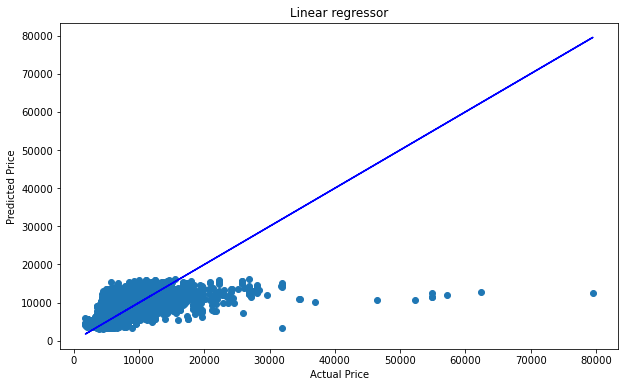

In [224]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,cmap='set1')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regressor")
plt.show()

## Random forest Regression Model

In [221]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)

# prediction
y_train_pred =RFR.predict(x_train) ##Predict train result
y_test_pred =RFR.predict(x_test) ##Predict test result
print('R2_Score:',r2_score(y_train.values,y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_Score: 0.9464071456165611
R2_Score: 0.7944750112676874
Mean abs error: 478.8072781062126
Mean squared error: 1129459.734015177


### Checking the performance of the model by graph

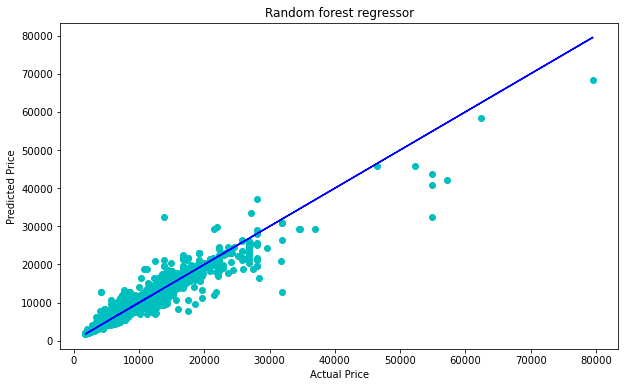

In [222]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,color='c')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

## KNN Regressor

In [219]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_train.values,y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_Score: 0.7772124319150245
R2_Score: 0.703013299130005
Mean abs error: 1206.0770340103352
Mean squared error: 4695207.7900314685


### Checking the performance of the model by graph

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

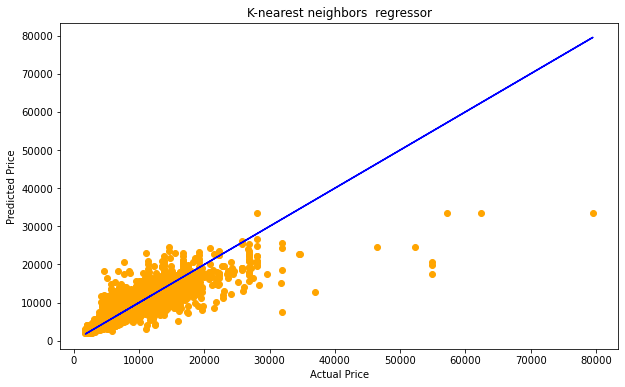

In [220]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,color='orange')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

## Support Vector Regression Model

In [217]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
y_train_pred =sv.predict(x_train) ##Predict train result
y_test_pred =sv.predict(x_test) ##Predict test result
print('R2_Score:',r2_score(y_train.values,y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_Score: 0.36450841242894927
R2_Score: 0.3866007585695542
Mean abs error: 2416.001972780861
Mean squared error: 13392870.518363023


### Checking the performance of the model by graph

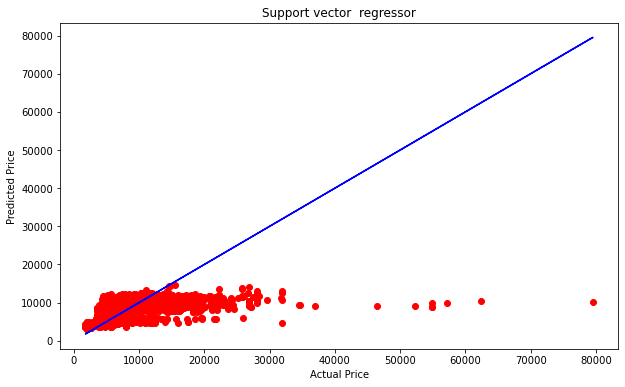

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,color='r')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Support vector  regressor")
plt.show()

## Grdient boosting Regressor

In [216]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
y_train_pred =Gb.predict(x_train) ##Predict train result
y_test_pred =Gb.predict(x_test) ##Predict test result
print('R2_Score:',r2_score(y_train.values, y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_Score: 0.8697412638030554
R2_Score: 0.8011322681172662
Mean abs error: 1037.065278869104
Mean squared error: 2745179.3570378926


### Checking the performance of the model by graph

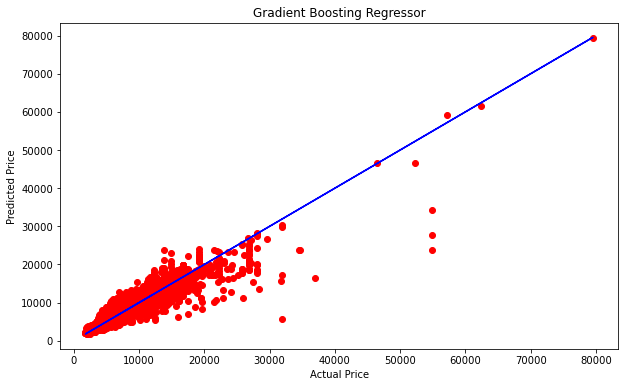

In [211]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,color='r')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

## Decision Tree Regressor

In [214]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
y_train_pred =DTR.predict(x_train) ##Predict train result
y_test_pred =DTR.predict(x_test) ##Predict test result
print('R2_Score:',r2_score(y_train.values, y_train_pred))
print('R2_Score:',r2_score(y_test, y_test_pred))
print('Mean abs error:',mean_absolute_error(y_train.values, y_train_pred))
print('Mean squared error:',mean_squared_error(y_train.values, y_train_pred))

R2_Score: 0.9590438426639856
R2_Score: 0.7259929505901412
Mean abs error: 323.4169393559612
Mean squared error: 863143.6243357313


### Checking the performance of the model by graph

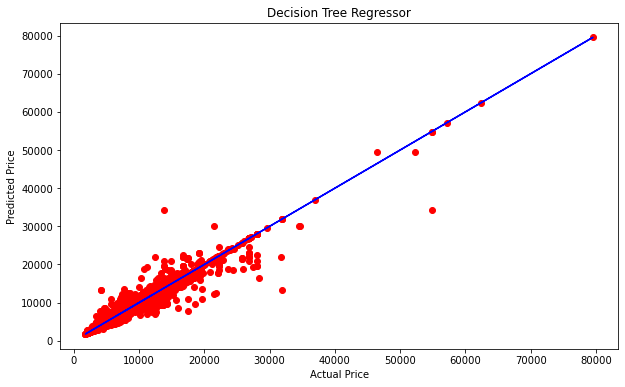

In [215]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_train.values,y=y_train_pred,color='r')
plt.plot(y_train.values,y_train.values,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

## Cross Validation Score for all the model

In [225]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Support Vector Regression
print('CV score for Support Vector  Regression: ',cross_val_score(sv,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  0.43243983335107555
CV score for Random forest Regression:  0.8087517147306572
CV score for KNN Regression:  0.7047126616838788
CV score for Support Vector  Regression:  0.3696395029838897
CV score for Gradient Boosting Regression:  0.8274076718730161
CV score for Decision Tree Regression:  0.7101049254960514


##### So accroding to the Cross validation score of all the model we can see that the best cv score is here is for the gradient boosting regressor

# Hyper Parameter Tuning

#### We will check on 2 regressor model for best prediction : Gradient Boosting Regressor and Random Forest Regressor

## The Gradient boosting regressor with GridsearchCV

In [226]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [227]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [228]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [229]:
CV_GBR.best_params_

{'alpha': 0.001,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 1}

### Creating Regressor Model with Gradient Boosting Regressor

In [230]:
GBR = GradientBoostingRegressor(n_estimators=400,alpha=0.001,learning_rate= 0.01, max_depth= 3, subsample = 1)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, learning_rate=0.01, n_estimators=400,
                          subsample=1)

In [231]:
#prediction
y_train_pred = GBR.predict(x_train)
y_test_pred = GBR.predict(x_test)
#R2 score
print("R2 score: ",r2_score(y_train.values, y_train_pred))
print("R2 score: ",r2_score(y_test, y_test_pred))
acc=r2_score(y_test, y_test_pred)
print(acc*100)

R2 score:  0.7438739957452054
R2 score:  0.7334754640365913
73.34754640365912


##### So after the Hypertuning now we have got a descent accuracy score of 73% on Gradient boosting

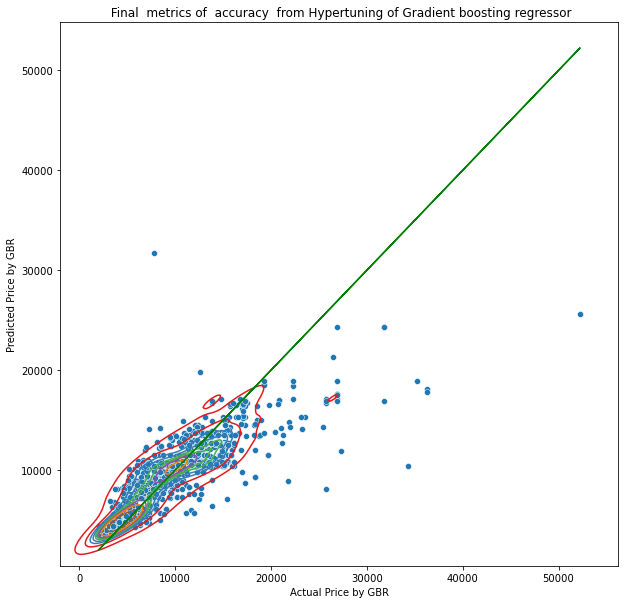

In [232]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_test_pred,palette='Set2')
sns.kdeplot(x=y_test,y=y_test_pred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by GBR")
plt.ylabel("Predicted Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

## The Random Forest regressor with GridsearchCV

In [233]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [234]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [235]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [236]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

### Creating Regressor Model with  Random Forest Regressor

In [242]:
RFR = RandomForestRegressor(random_state=50, max_features='auto', n_estimators= 60, max_depth=20, criterion='mse')
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=60, random_state=50)

In [243]:
#prediction
y_train_pred = RFR.predict(x_train)
y_test_pred = RFR.predict(x_test)
#R2 score
print("R2 score: ",r2_score(y_train.values, y_train_pred))
print("R2 score: ",r2_score(y_test, y_test_pred))
acc=r2_score(y_test, y_test_pred)
print(acc*100)

R2 score:  0.9461736771171787
R2 score:  0.7999836050646723
79.99836050646722


#### So after the Hypertuning now we have got a descent accuracy score of 79% on Random Forest Regressor

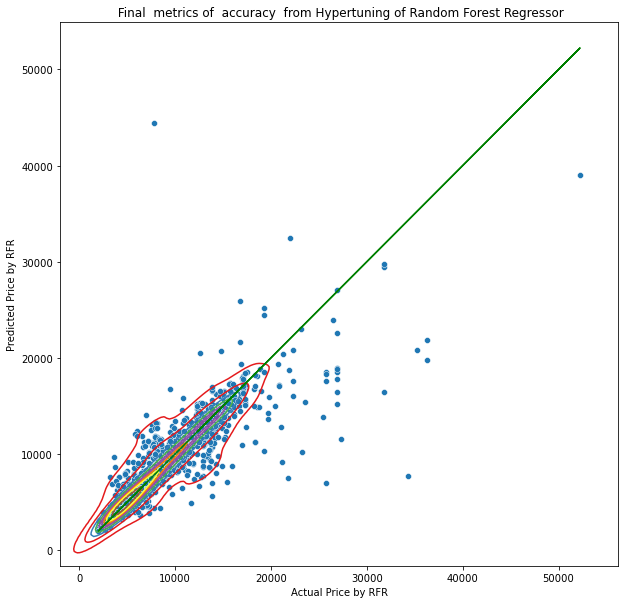

In [244]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_test_pred,palette='Set2')
sns.kdeplot(x=y_test,y=y_test_pred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by RFR")
plt.ylabel("Predicted Price by RFR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Random Forest Regressor")
plt.show()

In [245]:
#lets transform flight_test Dataset according to pca
x_pca_test=pca.transform(flight_test)

#### R2 Score of Gradient Boosting Regressor is 73.09755073225294 and  Random Forest Regressor is 76.373473574081. So we will use Random Forest Regressor for prediction as it is giving better accuracy compare to GBR.

## Saving The Predictive Model

### Saving The Predictive Model

In [246]:
#saving the model at local file system
filename='Flight_Price_Predict.pickle'
pickle.dump(GCV,open(filename,'wb'))
#prediction using the saved model
loaded_model1 = pickle.load(open(filename, 'rb'))
loaded_model1.predict(x_test)

array([ 6723.86914465,  5048.70098585,  5416.30862511, ...,
        7289.41371459, 15454.02935897, 12374.66473952])

### Checking predicted and original values

In [247]:
import numpy as np
a = np.array(y_test)
predicted1 = np.array(loaded_model1.predict(x_test))
Flight_Price_Predict = pd.DataFrame({"Original":a,"Predicted":predicted1},index= range(len(a)))
Flight_Price_Predict

,Original,Predicted
0,6938,6723.869145
1,5678,5048.700986
2,5601,5416.308625
3,12373,12259.518425
4,5694,7447.696606
...,...,...
2076,11622,11400.143744
2077,3543,3561.677204
2078,5998,7289.413715
2079,14441,15454.029359


### Let's plot and visualize

Text(0.5, 1.0, 'Original vs predicted  graph')

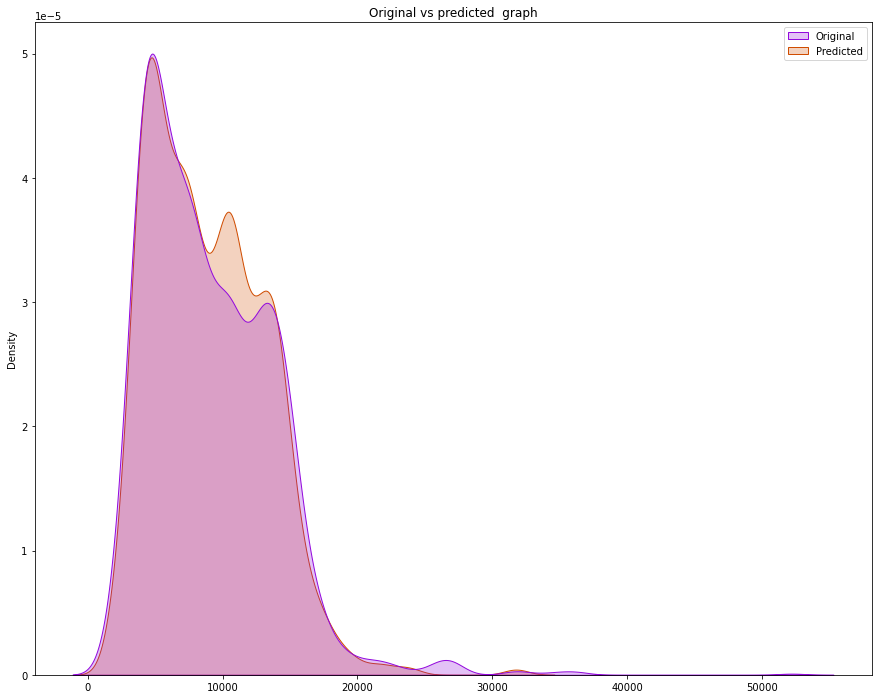

In [248]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Flight_Price_Predict, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

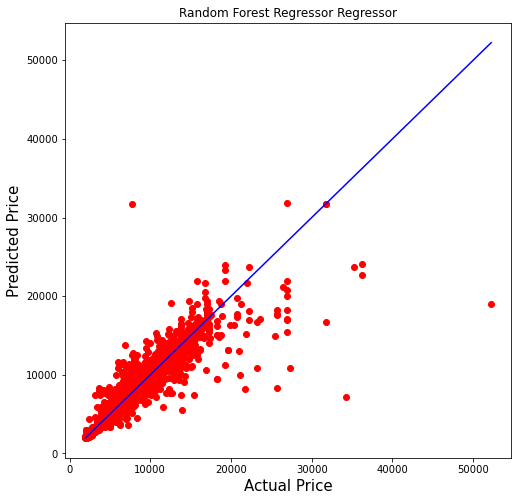

In [249]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted1,c='r')
plt1 = max(max(predicted1),max(y_test))
plt2 = min(min(predicted1),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.title("Random Forest Regressor Regressor")
plt.show()

#### Saving the model in CSV format

In [250]:
model =Flight_Price_Predict.to_csv('Flight_Price_Prediction.csv')
model